# **Проект: Исследование рынка недвижимости Санкт-Петербурга**

**Источник данных:**
сервис Яндекс.Недвижимость.

**Данные:**
архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 

**Задача:** 
- выполнить предобработку данных;
- изучить их;
- установить параметры определения рыночной стоимости объектов недвижимости;
- научиться отслеживать аномалии и мошенническую деятельность. 

**Доступны два вида данных:** 
-  данные пользователей:площадь квартиры, этаж и количество балконов; 
-  картографические данные: расстояние до центра, аэропорта, ближайшего парка/водоёма. 

### Открытие файла, первичный анализ данных

In [1]:
# Импортирую библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Данные предоставлены в файле csv. С помощью блокнота выяснила, что разделителем столбцов является \t, разделителем дроби - точка. 

In [2]:
# Открываю файл в pandas, сохраняю его в переменную df_0
df_0 = pd.read_csv('real_estate_data.csv', sep='\t')

In [3]:
# Открываю первые 10 строк загруженного файла
pd.set_option('display.max_columns', None)
df_0.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
# Выведу стандартную информацию о df с помощью info
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Выводы:**

- названия столбцов - правильные, замены не требуют;
- тип данных в столбце first_day_exposition с object нужно поменять на datetime;
- тип данных в столбце is_apartment нужно поменять на bool, для этого NaN заменим на False;
- тип данных в столбцах floors_total, balcony, days_exposition, parks_around3000 и ponds_around3000 из-за наличия пропусков в данных имеют тип float64, уберем пропуски и поменяем тип данных на int64; 
- пропуски есть как в пользовательских, так и в картографических данных;
- всего 22 столбца, 23699 строк;
- пропуски есть в 14 из 22 столбцов, соответственно 8 столбцов запоненны поностью.

Проработаю все эти моменты на следующем этапе исследования.

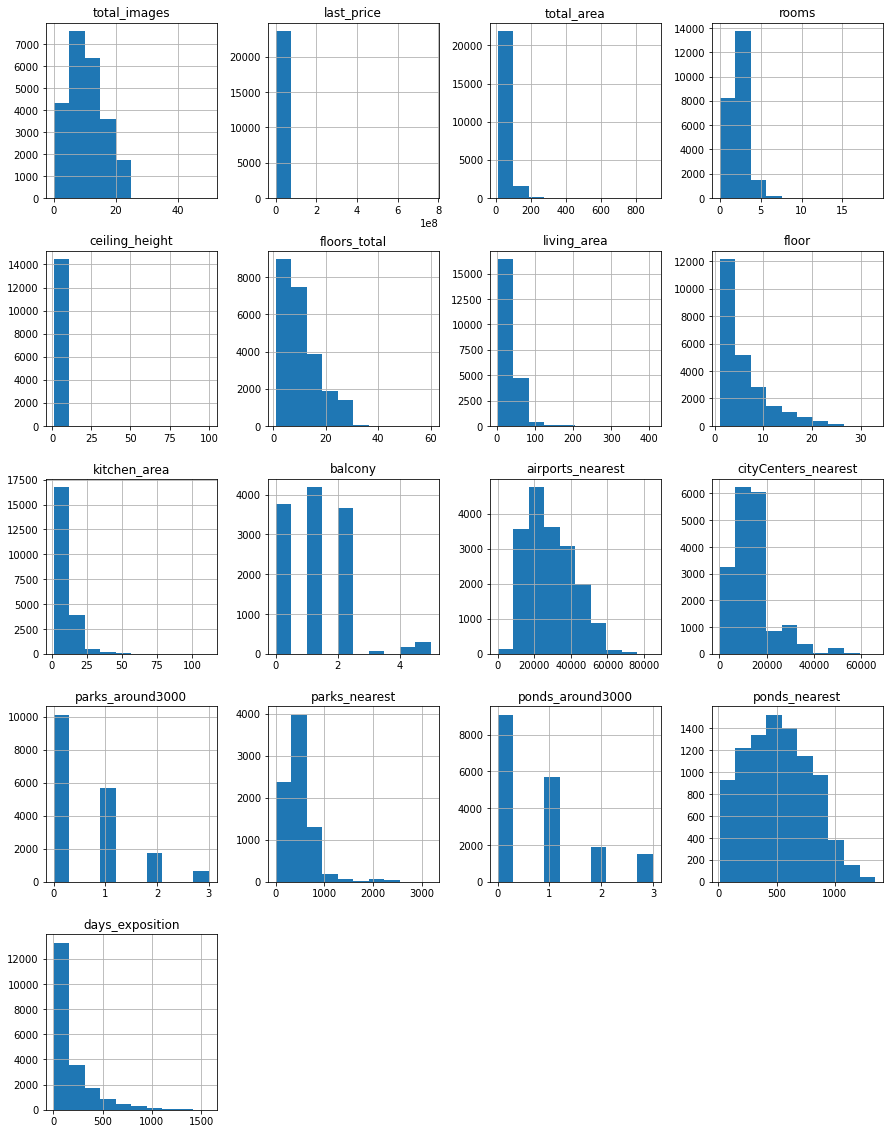

In [5]:
# Построю общую гистограмму для всех числовых столбцов таблицы
df_0.hist(figsize=(15, 20));

Гистограммы далеки от нормального распределения. 
В некоторых, например last_price, всего один видимый столбец. 

**Практически в каждом столбце есть аномальные значения - выбросы.**

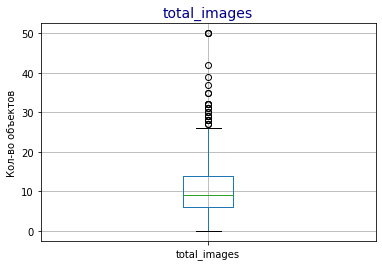

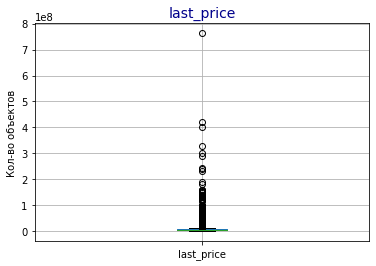

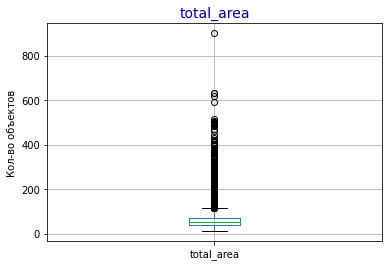

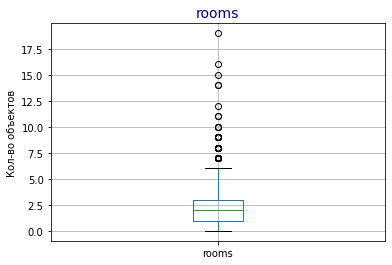

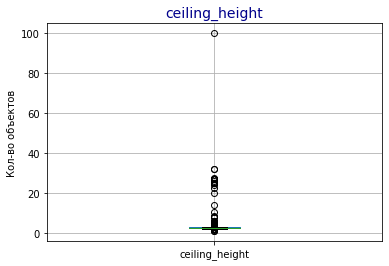

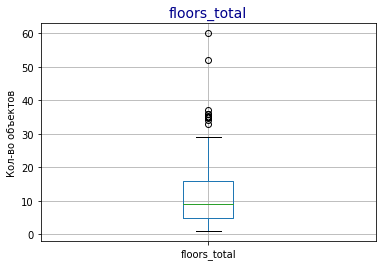

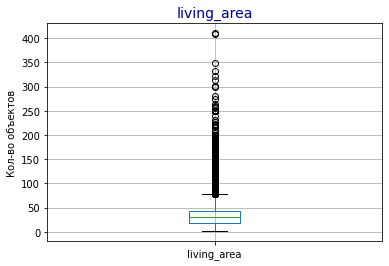

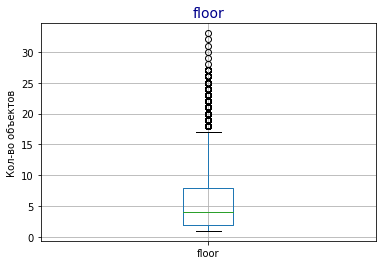

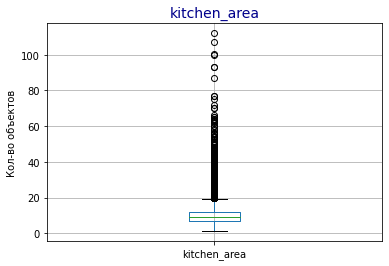

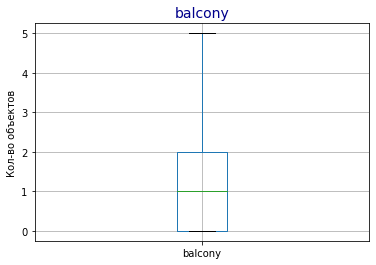

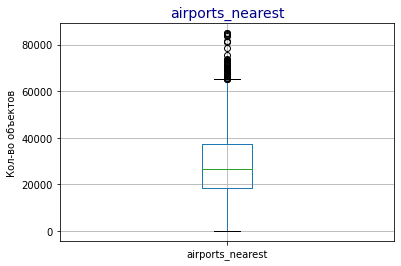

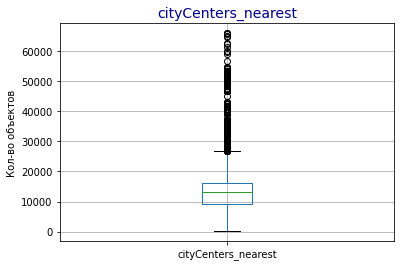

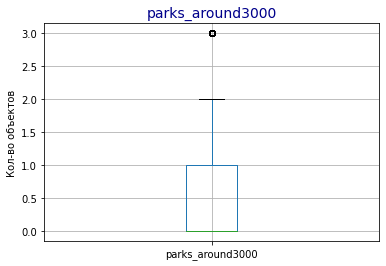

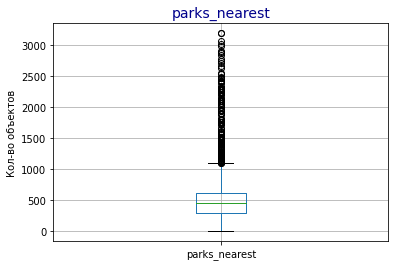

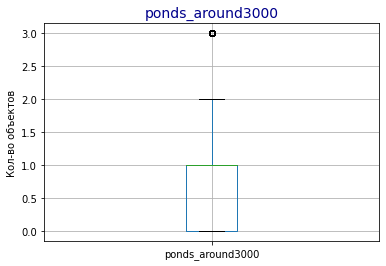

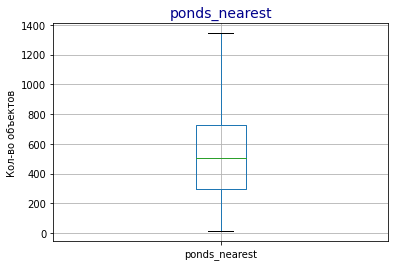

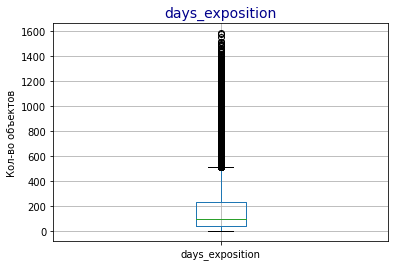

In [6]:
# Посторою boxplot по каждому столбцу
for i in df_0.select_dtypes(include=np.number).columns.tolist():
    plt.figure()
    df_0.boxplot([i])
    plt.ylabel('Кол-во объектов')
    plt.title(f'{i}', size=14, color='darkblue')
    plt.show()

Много выбросов.

Без предварительной обработки дальнейший анализ данных невозможен.

### Предобработка данных

#### Устранение пропусков в столбцах

In [7]:
# Определим, в каких столбцах есть пропуски
columns_with_nan = df_0.isna().sum()
columns_with_nan[columns_with_nan!=0].sort_index()

airports_nearest        5542
balcony                11519
ceiling_height          9195
cityCenters_nearest     5519
days_exposition         3181
floors_total              86
is_apartment           20924
kitchen_area            2278
living_area             1903
locality_name             49
parks_around3000        5518
parks_nearest          15620
ponds_around3000        5518
ponds_nearest          14589
dtype: int64

In [8]:
# Посчитаю количество столбцов с пропусками
len(columns_with_nan[columns_with_nan!=0])

14

Пропуски в данных продавцов связаны с человеческим фактором.

Пропуски в картографических данных и данных о сроке экспозции скорее всего имеют техническую природу.

Заполнение пропусков данных аналитиком всегда субъективно, следовательно, многовариантно и не всегда идеально. 

Посмотрим, сколько данных мы потеряем, если просто удалим пропуски.

In [9]:
# Создам копию датасета и удалю все пропуски
df1 = df_0.copy(deep=True)
df1.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 42 to 23671
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          250 non-null    int64  
 1   last_price            250 non-null    float64
 2   total_area            250 non-null    float64
 3   first_day_exposition  250 non-null    object 
 4   rooms                 250 non-null    int64  
 5   ceiling_height        250 non-null    float64
 6   floors_total          250 non-null    float64
 7   living_area           250 non-null    float64
 8   floor                 250 non-null    int64  
 9   is_apartment          250 non-null    object 
 10  studio                250 non-null    bool   
 11  open_plan             250 non-null    bool   
 12  kitchen_area          250 non-null    float64
 13  balcony               250 non-null    float64
 14  locality_name         250 non-null    object 
 15  airports_nearest    

Увы, полное удаление пропусков - не лучший вариант. Пойдем по отдельным столбцам.

In [10]:
# Создам копию исходного датасета
df = df_0.copy(deep=True)

##### **Столбец is_apartment**

должет иметь тип данных bool. Пропуски с высокой степенью вероятности можно объяснить тем, что объект не относится к типу апартаменты, поэтому владельцы ничего не указали. Заменим NaN на False

In [11]:
# заполню пропуски в столбце is_apartment на False
df['is_apartment'] = df['is_apartment'].fillna(value=False)

##### **Столбц balcony**

NaN заменим на 0, скорее всего балконов нет, поэтому владельцы ничего не указали

In [12]:
# заполню пропуски в столбце balcony на 0
df['balcony'] = df['balcony'].fillna(value=0)

##### **Столбец locality_name**

очень важен и пропусков в этом столбце всего 0.2% (49/23699). Поэтому удалим 49 строк с NaN.

In [13]:
# удалю пропуски в столбце locality_name
df = df.dropna(subset=['locality_name'])

##### **Столбце ceiling_height** 

заменим NaN на 2.65 - средняя высота жилых помещений в РФ.

In [14]:
# заполню пропуски в столбце ceiling_height на 2.65
df['ceiling_height'] = df['ceiling_height'].fillna(value=2.65)

##### **Столбце floors_total**

пропусков менее 0.5%. Заменим NaN на значение столбца floor.

In [15]:
# заменю пропуски в столбце floors_total
df['floors_total'] = df['floors_total'].combine_first(df['floor'])

##### **Столбцы living_area и kitchen_area**

пропуски занимают почти 10%. 
Найдем какой удельный вес в среднем они занимают в total_area 
и исходя из этого заполним пропуски.

In [16]:
# заменю пропуски в столбцах living_area и kitchen_area
mean_living_area = (df['living_area']/df['total_area']).mean()
mean_kitchen_area = (df['kitchen_area']/df['total_area']).mean()
df.loc[df['living_area'].isna(), 'living_area'] = df['total_area']*mean_living_area
df.loc[df['kitchen_area'].isna(), 'kitchen_area'] = df['total_area']*mean_kitchen_area

Отсутствие **картографических данных** может быть связано с техническим сбоем или неправильным названием населенного пункта в столбце locality_name. Таких пропусков много. В реальном кейсе следовало бы задать вопрос поставщику данных. В данном случае оставлю NaN. Пока гистограммы по этим данным самые читаемые. 
Если наличие NaN вызовет трудности в дальнейшем анализе, вернусь на данный шаг.

Создадим в df столбец **is_spb** с типом данных bool. True - locality_name == 'Санкт-Петербург'

In [17]:
# создам столбец 'is_spb'
df['is_spb'] = (df['locality_name']=='Санкт-Петербург')

##### **Столбец days_exposition**

Пропуск в данном столбце означает, что объект еще продается и объявление не снято с публикации, следовательно, сохраним пропуски. 

In [18]:
# Проверю, что получилось с помощью метода info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23650 non-null  float64
 7   living_area           23650 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23650 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

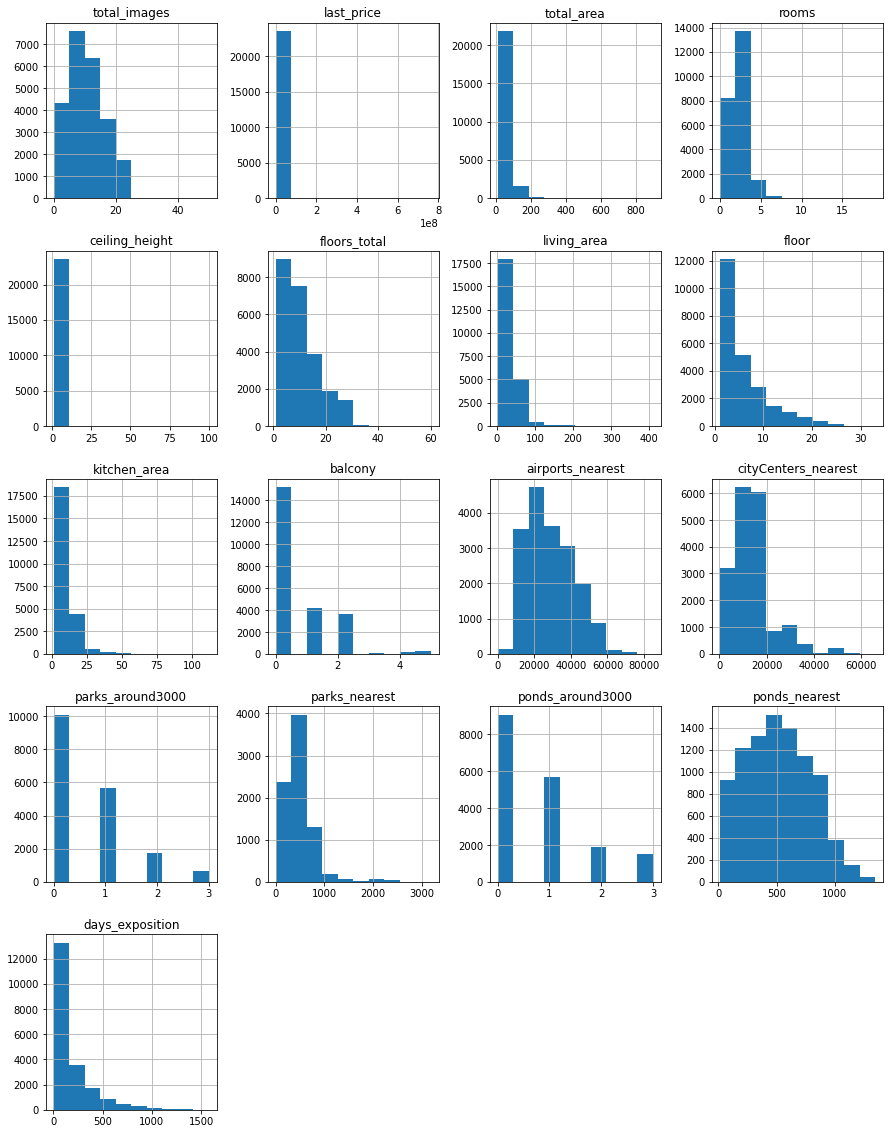

In [19]:
# Построю гисторгаммы столбцов
df.hist(figsize=(15, 20));

Гистограммы не изменились. 16 из 23 столбцов не имеют пропусков. 
NaN остались только в 6 столбцах с картографическими данными и столбце days_exposition. 
Пока все по плану. Идем дальше.

#### Корректировка типов данных

Как выяснили на 1 шаге в столбце **first_day_exposition** нужно заменить тип данных object на datetime. Сделаем это, возможно мы еще будем работать с датой.

In [20]:
# изменю тип данных в столбце  first_day_exposition 
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Изменим тип данных float64 на int64 в столбцах: **floors_total, balcony**. Ранее float64 был вызван наличием в столбце NaN. Замена не выглядит обязательной, но приятно, когда тип данных полностью соответствует их характеру.
Столбцы **days_exposition, parks_around3000 и ponds_around3000** пока остаются float64.

In [21]:
# изменю тип данных в столбцах  floors_total, balcony
df[['floors_total', 'balcony']] = df[['floors_total', 'balcony']].astype(int)

In [22]:
# Проверим как прошла замена типов данных
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int64         
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

#### Устранение неявных дубликатов


Источником неявных дубликатов может быть только **столбец locality_name**.

In [23]:
# узна. количество уникальных значений столбца
df['locality_name'].nunique()

364

In [24]:
# Проверю на отсортированный список уникальных значений столбца 'locality_name'
sorted(df['locality_name'].unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

Список очень большой, вручную скрытые дубли не найти. Проверим поговорку "глаза боятся, а руки делают"...

Первое, что приходит в голову удалить из названия тип населенных пунктов, оставив только имя...

In [25]:
# удалю из названия населенного пункта тип и создам столбец locality_name_1
df['locality_name_1'] = df['locality_name'].apply(lambda x: ''.join([i for i in x.split(' ') if i.lower() not in ['село', 'поселок', 'посёлок', 'городского', 'типа', 'городской', 'деревня', 'имени', 'коттеджный', 'станции', 'при', 'железнодорожной', 'садовое','товарищество', 'садоводческое', 'некоммерческое']]))

In [26]:
# еще раз проверюкол-во уникальных названий
df['locality_name_1'].nunique()

305

Однако названия могут быть одинаковыми у разных населенных пунктов. Поэтому удалю столбец locality_name_1 и просто заменю "ё" на "е" в locality_name

In [27]:
# удалю столбец locality_name_1
df = df.drop(columns='locality_name_1')

In [28]:
# заменю  "ё" на "е" и проверю кол-во уникальных названий 
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')
df['locality_name'].nunique()

330

Количество уникальных значений уменьшилось.

Еще у нас 6 видов поселков: поселок, поселок городского типа, городской поселок, поселок станция, поселок при железнодорожной станции и коттеджный поселок. Поищем среди них неявные дубликаты.

In [29]:
# заменю название 'городской поселок' на 'поселок городского типа' и посчитаю кол-во уникальных названий
df['locality_name'] = df['locality_name'].str.replace('городской поселок', 'поселок городского типа')
df['locality_name'].nunique()

323

In [30]:
# заменю название 'поселок городского типа' на 'поселок' и посчитаю кол-во уникальных названий
df['locality_name'].str.replace('поселок городского типа', 'поселок').nunique()

322

Одно совпадение названий у поселков и поселков городского типа. 
Это Рябово, сохраню его как 'поселок городского типа Рябово'

In [31]:
# заменю название 'поселок Рябово' на 'поселок городского типа Рябово' и посчитаю кол-во уникальных названий
df['locality_name'].str.replace('поселок городского типа', 'поселок').nunique()
df['locality_name'] = df['locality_name'].str.replace('поселок Рябово', 'поселок городского типа Рябово')
df['locality_name'].nunique()

322

In [32]:
# заменю название 'коттеджный поселок' на 'поселок' и посчитаю кол-во уникальных названий
df['locality_name'].str.replace('коттеджный поселок', 'поселок').nunique()

321

Одно совпадение у коттеджный поселков и поселков - это Лесное.
Картографической информации по поселку Лесное нет, поэтому оставлю все как есть, пусть это будут 2 поселка с одним названием.

In [33]:
# заменю название 'поселок городского типа' на 'село' и посчитаю кол-во уникальных названий
df['locality_name'].str.replace('поселок городского типа', 'село').nunique() #село Павлово
df['locality_name'] = df['locality_name'].str.replace('село Павлово', 'поселок городского типа Павлово')
df['locality_name'].nunique()

321

In [34]:
# заменю название 'поселок станции' на 'поселок при железнодорожной станции' и посчитаю кол-во уникальных названий
df['locality_name'] = df['locality_name'].str.replace('поселок станции', 'поселок при железнодорожной станции')
df['locality_name'].nunique()

319

In [35]:
# заменю название 'село Никольское' на 'Никольское' и посчитаю кол-во уникальных названий
df['locality_name'] = df['locality_name'].str.replace('село Никольское', 'Никольское')
df['locality_name'].nunique()

318

In [36]:
df['locality_name'].str.lower().nunique()

318

Регистр не выявил дублей.

Неблагодарное дело искать скрытые дубли. Оставлю 318 уникальных значений.
В итоговом выводе я еще вернусь к этой теме.

In [37]:
# проверю на явные дубликаты.
df.duplicated().sum()

0

Пусто, переходим к аномалиям.

#### Устранение выбросов значения

Вспомним какие некрасивые гистограммы получились на первом шаге 
и запросим описательную статистику по числовым столбцам 
у функции describe() с целью найти аномалии.

In [38]:
# использую метод describe
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23650.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,18116.000000,18139.000000,18140.000000,8064.000000,18140.000000,9085.000000,20470.000000
mean,9.862326,6.541127e+06,60.329069,2.070106,2.724311,10.673784,34.550654,5.893277,10.569202,0.591712,28803.225878,14197.860742,0.611577,490.830729,0.769680,518.059879,180.753200
std,5.682278,1.089640e+07,35.661808,1.078620,0.989255,6.593455,22.331901,4.883317,6.092953,0.959662,12637.314144,8606.830295,0.802003,342.554386,0.937948,277.841733,219.777916
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18575.750000,9241.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.050045,0.000000,26756.500000,13105.000000,0.000000,454.500000,1.000000,502.000000,95.000000
75%,14.000000,6.799000e+06,69.700000,3.000000,2.700000,16.000000,42.093469,8.000000,12.000000,1.000000,37294.000000,16293.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


17 столбцов с количественными переменными.

Редкие и выбивающиеся значения - это значения близкие к минимуму или максимуму,
либо не выдерживающие логической проверки, либо выходящие за рамки 1.5 межквартильного диапазона.


##### **Столбец total_images:**

максимальное количество 50 фото вызывает сомнение, 
даже количество фото более 20 вызывает сомнение, 
так как на сайтах есть ограничения по объему и количеству загружаемых фото. 
Однако источником информации не является пользователь, следовательно ошибки в записи нет, 
если только не технический сбой. 
Оставлю все как есть, 
на практике можно было бы уточнить данный вопрос у поставщика информации.

##### **Столбец last_price** 

очень важный с точки зрения анализа. Изучим его с помощью метода value_counts(). 
Узнаем какую долю занимают данные превышающие 1.5 межквартильный размах.

In [39]:
# исследую столбец last_price с помощью метода value_counts
df['last_price'].value_counts().sort_index()

12190.0        1
430000.0       2
440000.0       1
450000.0       4
470000.0       3
              ..
300000000.0    1
330000000.0    1
401300000.0    1
420000000.0    1
763000000.0    1
Name: last_price, Length: 2964, dtype: int64

In [40]:
# напишу функцию, которая считает долю данных превышащих 1.5 межквартильный размах по столбцу
def search_out(col, k=1.5):
    p25 = np.quantile(col, 0.25)
    p75 = np.quantile(col, 0.75)
    return (1 - ((col >= p25 - k*(p75-p25)) & (col <= p75 + k*(p75-p25))).mean())

In [41]:
# найду долю данных превышащих 1.5 межквартильный размах по столбцу last_price
search_out(df['last_price'])

0.08689217758985202

In [42]:
# рассчитаю нижний 1.5 межквантильный диапазон и верхний 1.5 межквантильный диапазон столбца last_price
p25 = np.quantile(df['last_price'], 0.25)
p75 = np.quantile(df['last_price'], 0.75)
print(f'Межквантильный диапазон {p75-p25}')
print(f'Нижний 1.5 межквантильный диапазон {p25 - 1.5*(p75-p25)}')
print(f'Верхний 1.5 межквантильный диапазон {p75 + 1.5*(p75-p25)}')

Межквантильный диапазон 3399000.0
Нижний 1.5 межквантильный диапазон -1698500.0
Верхний 1.5 межквантильный диапазон 11897500.0


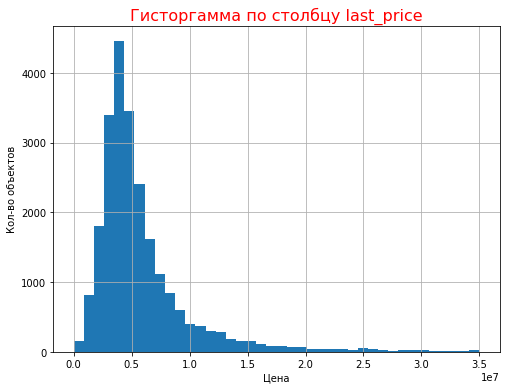

In [43]:
# построю гистограмму по столбцу last_price
df['last_price'].hist(figsize=(8, 6), range=(0, 3.5e7), bins=40)
plt.xlabel('Цена')
plt.ylabel('Кол-во объектов')
plt.title('Гисторгамма по столбцу last_price', size=16, color='red')
plt.show()

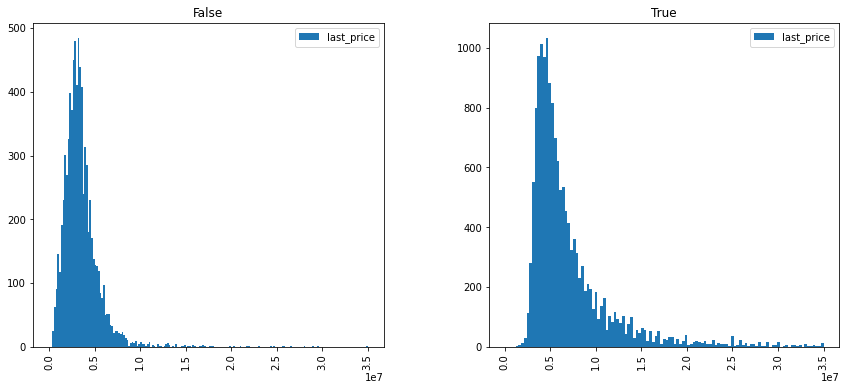

In [44]:
# построю гистограмму по столбцу last_price в разрезе СПБ/область
df.hist(column='last_price', by='is_spb', figsize=(14, 6), legend=True, range=(0, 3.5e7), bins='auto');

В столбце большое количество одиночных объектов с аномальной ценой, размах от 12190 до 763 000 000.

1.5 квантильного диапазон, к сожалению, не поможет избавится от выбрасов. С его позиций цена 12190 - это нормально, а 763 млн - нет. Логика, наоборот, скажет, что 12190 - ненормально, а 763 млн - вероятно.

Поэтому избавлюсь от единичных объектов с ценой, близкой к границам размаха.

Так как в задании нет цели анализировать объекты в разрезе рыночных сегментов, возьму в работу диапазон от 500 000 до 15 000 000.

In [45]:
# очистим датасет от выбросов столбца last_price
df = df.query('0.5e+06<=last_price<=1.5e+07')
df['last_price'].value_counts().sort_index()

500000.0       4
520000.0       1
530000.0       1
550000.0       6
560000.0       3
              ..
14990000.0     7
14998000.0     1
14999000.0     1
14999999.0     1
15000000.0    41
Name: last_price, Length: 2405, dtype: int64

In [46]:
# изучим столбец last_price
df['last_price'].describe()

count    2.243600e+04
mean     5.163441e+06
std      2.714095e+06
min      5.000000e+05
25%      3.370000e+06
50%      4.500000e+06
75%      6.300000e+06
max      1.500000e+07
Name: last_price, dtype: float64

Таким образом осталось 22436 объекта против ранее бывших 23650

##### **Столбец total_area** 

также очень важен с точки зрения анализа.


In [47]:
# изучим значения столбеца total_area
df['total_area'].value_counts().sort_index()

12.00     1
13.00     3
13.20     1
14.00     1
15.00     2
         ..
238.26    1
250.00    1
255.00    1
259.60    1
320.00    1
Name: total_area, Length: 1815, dtype: int64

In [48]:
# найду долю данных превышащих 1.5 межквартильный размах по столбцу total_area
search_out(df['total_area'])

0.029461579604207477

In [49]:
# рассчитаю нижний 1.5 межквантильный диапазон и верхний 1.5 межквантильный диапазон столбца total_area
p25 = np.quantile(df['total_area'], 0.25)
p75 = np.quantile(df['total_area'], 0.75)
print(f'Межквантильный диапазон {p75-p25}')
print(f'Нижний 1.5 межквантильный диапазон {p25 - 1.5*(p75-p25)}')
print(f'Верхний 1.5 межквантильный диапазон {p75 + 1.5*(p75-p25)}')

Межквантильный диапазон 26.4
Нижний 1.5 межквантильный диапазон -0.19999999999999574
Верхний 1.5 межквантильный диапазон 105.39999999999999


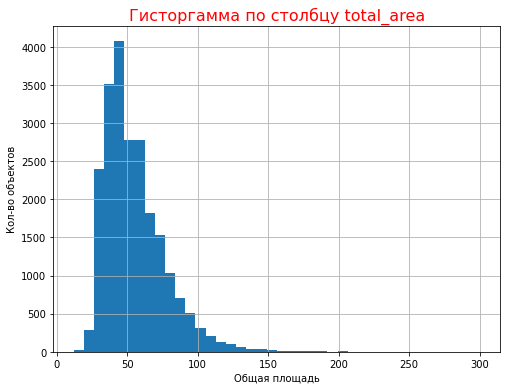

In [50]:
# построю гисторгамму по столбцу total_area
df['total_area'].hist(figsize=(8, 6), range=(12, 300), bins=40)
plt.xlabel('Общая площадь')
plt.ylabel('Кол-во объектов')
plt.title('Гисторгамма по столбцу total_area', size=16, color='red')
plt.show()

Опять 1.5 межквартильный диапазон ни о чем.
Могут ли объекты иметь общую площадь 12м? Да, если это комнаты, но такие объекты одиночны и нам не интересны.
Максимальная площадь 320 м2 тоже не выглядит аномальной, но такой объект один.
Возьмем в работу диапазон от 25 до 150 м2.

In [51]:
# очищу датасет от выбросов столбца total_area
df = df.query('25<=total_area<=150')

In [52]:
# посмотрю на измененный столбец total_area
df['total_area'].describe()

count    22161.000000
mean        55.020386
std         20.442302
min         25.000000
25%         40.000000
50%         50.400000
75%         65.700000
max        150.000000
Name: total_area, dtype: float64

##### **Столбец rooms**

Минимальное значение 0, таких объектов - 135, сложно сказать почему продавцы не указали эту информацию в объявлении, наверное невнимательность. Эти объекты имеют закономерность: низкая цена, минимальная площадь, данные об общей площади у объектов есть. Следовательно, мы имеем дело с однокомнытными квартирами. Заменим 0 на 1.

Максимальное количество комнат - 7(в первом df было 19). Это количество выглядит нормальным, оставим данные.

In [53]:
# изучу значения столбца rooms
df['rooms'].value_counts().sort_index()

0     135
1    7880
2    7751
3    5341
4     872
5     157
6      21
7       4
Name: rooms, dtype: int64

In [54]:
# посмотрю на объекты с количеством комнат 0
df.loc[df['rooms']==0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,is_spb
144,1,2450000.0,27.00,2017-03-30,0,2.65,24,15.50000,2,False,True,False,5.059031,2,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0,False
349,4,2320000.0,25.00,2017-09-27,0,2.65,14,17.00000,1,False,False,True,4.684288,0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0,False
440,8,2480000.0,27.11,2018-03-12,0,2.65,17,24.75000,4,False,True,False,5.079642,2,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0,True
508,0,3375000.0,34.40,2017-03-28,0,2.65,26,24.30000,19,False,False,True,6.445581,1,поселок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0,False
608,2,1850000.0,25.00,2019-02-20,0,2.65,10,14.11875,7,False,True,False,4.684288,0,поселок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01,0,2.65,25,18.00000,16,False,True,False,4.871660,0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0,True
23442,0,2500000.0,27.70,2017-09-28,0,2.65,24,18.00000,4,False,False,True,5.190191,2,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0,False
23554,15,3350000.0,26.00,2018-09-07,0,2.65,19,14.68350,8,False,True,False,4.871660,0,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0,True
23592,10,1450000.0,29.00,2017-11-11,0,2.65,9,18.00000,8,False,False,True,5.433774,2,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0,False


In [55]:
# заменю количество комнат 0 на 1
df.loc[df['rooms']==0, 'rooms'] = 1

##### **Столбец ceiling_height**

высота в жилых домаз 2.5 - 2.7 м, ремонт может съесть 0.1 м. Следовательно ниже 2.4 м. потолков не должно быть, в нашем df таких объектов 20. Можно их смело удалить, либо присвоить высоту 2.4 м. Присвою. Единственный объект высотой 100 м. удалю. Высоты с 24 до 32 уменьшим в 10 раз, скорее всего это опечатка. Максимальные высоты в жилых домах - 4 м., может 1 этаж или мансарда будут 5 м.....Заменю эти высоты на 2.7

In [56]:
df['ceiling_height'].value_counts().sort_index()

1.00       1
1.20       1
1.75       1
2.00      11
2.25       1
          ..
26.00      1
27.00      8
27.50      1
32.00      2
100.00     1
Name: ceiling_height, Length: 166, dtype: int64

In [57]:
df.loc[df['ceiling_height']<2.4, 'ceiling_height'] = 2.4

In [58]:
df = df[df.ceiling_height!=100]

In [59]:
df.loc[(df['ceiling_height']>=24)&(df['ceiling_height']<33), 'ceiling_height'] = df['ceiling_height']/10

In [60]:
df.loc[(df['ceiling_height']>=5)&(df['ceiling_height']<24), 'ceiling_height'] = 2.7

##### **Столбец floors_total**

52 и 60 этаж заменим на 6, скорее всего это опечатки. 

In [61]:
# изучу значения столбца floors_total
df['floors_total'].value_counts().sort_index()

1       26
2      361
3      616
4     1076
5     5527
6      730
7      467
8      279
9     3684
10    1114
11     179
12    1302
13     209
14     542
15     341
16    1294
17     802
18     476
19     312
20     250
21     153
22     273
23     335
24     437
25    1037
26     123
27     162
28      21
29       1
33       1
34       1
35      23
36       3
37       1
52       1
60       1
Name: floors_total, dtype: int64

In [62]:
# произведу замену в столбце floors_total
df.loc[df['floors_total'].isin([52, 60]), 'floors_total'] = 6

##### **Столбец living_area**

Частая ошибка -площадь кухни больше, чем жиая площадь. Надо поменять их местами.

In [63]:
df.loc[df['kitchen_area']>df['living_area'], 'living_area'].count()

305

In [64]:
df.loc[df['living_area']>df['total_area'], 'living_area'].count()

0

In [65]:
df['temp'] = df['living_area'].copy()
df.loc[df['kitchen_area']>df['living_area'], 'living_area'] = df['kitchen_area']
df.loc[df['kitchen_area']>df['temp'], 'kitchen_area'] = df['temp']
df.loc[df['kitchen_area']>df['living_area'], 'living_area'].count()

0

In [66]:
df = df.drop(columns='temp')

##### **столбец floor**	

сравню со столбцом floors_total, если значение floor больше заменю его на значение floors_total.

In [67]:
df['floor'].value_counts().sort_index()

1     2798
2     3150
3     2842
4     2581
5     2448
6     1188
7     1123
8     1023
9     1010
10     644
11     495
12     494
13     355
14     321
15     324
16     297
17     211
18     165
19     128
20     105
21     112
22     106
23      95
24      62
25      43
26      24
27      10
28       1
29       1
30       1
31       1
32       1
33       1
Name: floor, dtype: int64

In [68]:
df.loc[df['floor']>df['floors_total'], 'floor'].count()

1

In [69]:
df.loc[df['floor']>df['floors_total'], 'floor'] = df['floors_total']
df.loc[df['floor']>df['floors_total'], 'floor'].count()      

0

##### **Столбцы kitchen_area и balcony**

Оставлю без изменений

##### **Столбцы airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around3000	ponds_nearest**

значения генерировались без участия пользователей и выглядят достоверно. Оставлю столбцы без изменений

##### **Столбец days_exposition**

Важный для анализа столбец. Данные должны создаваться в автоматическом режиме.
Непонятно откуда взялись объекты со сроком экспозиции более года. Средний срок экспозции в СПб около 80 дней. Прямо мертвые души какие-то. Нужно задать вопрос поставщику данных...или задуматься о добросовестности лиц, публикующих объявления...

In [70]:
df['days_exposition'].value_counts().sort_index()

1.0         1
2.0         3
3.0       152
4.0       168
5.0       142
         ... 
1497.0      1
1512.0      2
1513.0      1
1553.0      1
1580.0      1
Name: days_exposition, Length: 1112, dtype: int64

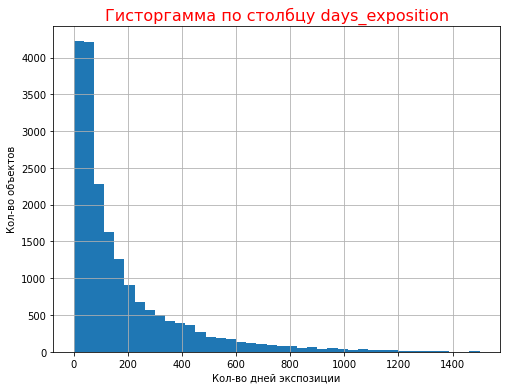

In [71]:
df['days_exposition'].hist(figsize=(8, 6), range=(0, 1500), bins=40)
plt.xlabel('Кол-во дней экспозиции')
plt.ylabel('Кол-во объектов')
plt.title('Гисторгамма по столбцу days_exposition', size=16, color='red')
plt.show()

In [72]:
df.query('days_exposition>366')['days_exposition'].count()

2754

Оставлю объекты со сроком экспозиции 366 дней, хотя и потеряю на этом 2754 объектов.

In [73]:
df = df[(df['days_exposition'].isna())|(df['days_exposition']<=366)]

#### Результаты первичной обработки данных

In [74]:
# использую метод describe
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,19406.000000,1.940600e+04,19406.000000,19406.000000,19406.000000,19406.000000,19406.000000,19406.000000,19406.000000,19406.000000,14663.000000,14678.000000,14679.000000,6181.000000,14679.000000,7033.000000,16608.000000
mean,9.876533,5.102991e+06,54.430336,1.967124,2.675812,10.812068,31.224802,5.932856,9.689092,0.602649,28968.157335,14820.465731,0.562845,489.163242,0.708904,534.564340,103.956045
std,5.610717,2.620765e+06,19.908314,0.909426,0.184619,6.620573,13.729308,4.904444,3.848598,0.954816,12954.892952,8434.831449,0.765082,329.478948,0.893694,275.977805,89.250108
min,0.000000,5.000000e+05,25.000000,1.000000,2.400000,1.000000,9.000000,1.000000,1.300000,0.000000,0.000000,208.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.395114e+06,39.500000,1.000000,2.600000,5.000000,18.800000,2.000000,7.000000,0.000000,18081.000000,10477.250000,0.000000,291.000000,0.000000,319.000000,37.000000
50%,10.000000,4.500000e+06,50.000000,2.000000,2.650000,9.000000,29.600000,4.000000,9.000000,0.000000,27199.000000,13512.500000,0.000000,456.000000,0.000000,524.000000,73.000000
75%,14.000000,6.200000e+06,65.000000,3.000000,2.700000,16.000000,39.900000,8.000000,11.167343,1.000000,37717.000000,16558.750000,1.000000,612.000000,1.000000,747.000000,152.000000
max,50.000000,1.500000e+07,150.000000,7.000000,4.800000,37.000000,128.000000,33.000000,50.200000,5.000000,84853.000000,65952.000000,3.000000,3190.000000,3.000000,1344.000000,365.000000


In [75]:
# Узнаю насколько уменьшился исходный датасет
df.shape[0] / df_0.shape[0]

0.818853116165239

Датасет тает на глазах из 23699 объектов осталось 19406, т.е. удалено примерно 18%.
Зато оставшиеся данные можно анализировать дальше.

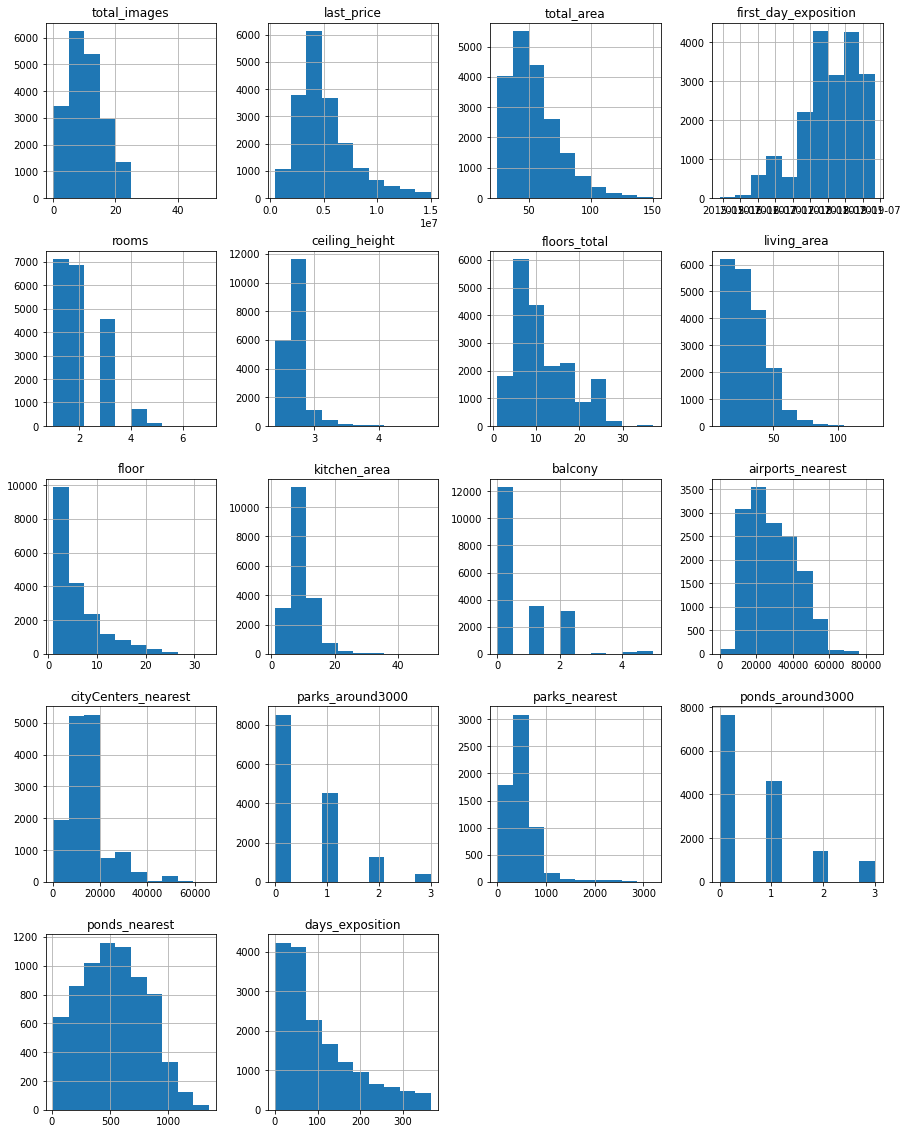

In [76]:
df.hist(figsize=(15, 20));

Гистограммы тоже стали более понятными.

### Расчет и создание новых столбцов

Добавим в df столбец с ценой одного квадратного метра, 
назавем его **square_meter_price**

In [77]:
df['square_meter_price'] = df['last_price']/df['total_area']
df['square_meter_price'].value_counts().sort_index()

9615.384615      1
10185.185185     1
10507.246377     1
10769.230769     1
10897.435897     1
                ..
286538.461538    1
299000.000000    1
312240.000000    1
350070.257611    1
387096.774194    1
Name: square_meter_price, Length: 12455, dtype: int64

Добавим в df столбец день недели публикации объявления 
(0 — понедельник, 1 — вторник и так далее), назавем его **weekday_first_day_exposition**

In [78]:
df['weekday_first_day_exposition'] = df['first_day_exposition'].dt.weekday

Добавим в df столбец месяц публикации объявления, назавем его **month_first_day_exposition**

In [79]:
df['month_first_day_exposition'] = df['first_day_exposition'].dt.month

Добавим в df столбец год публикации объявления, назавем его **year_first_day_exposition**

In [80]:
df['year_first_day_exposition'] = df['first_day_exposition'].dt.year

Добавим в df столбец тип этажа квартиры (значения — «первый», «последний», «другой»), 
назавем его **type_floor**

In [81]:
df['type_floor'] = 'другой'
df['type_floor'] = df['type_floor'].where(df['floor']!=1, 'первый')
df['type_floor'] = df['type_floor'].where(df['floor']!=df['floors_total'], 'последний')

Добавим в df столбец расстояние до центра города в километрах, 
назавем его **cityCenters_nearest_km**

In [82]:
df['cityCenters_nearest_km'] = round(df['cityCenters_nearest']/1000)

Проверим результаты.

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19406 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   total_images                  19406 non-null  int64         
 1   last_price                    19406 non-null  float64       
 2   total_area                    19406 non-null  float64       
 3   first_day_exposition          19406 non-null  datetime64[ns]
 4   rooms                         19406 non-null  int64         
 5   ceiling_height                19406 non-null  float64       
 6   floors_total                  19406 non-null  int64         
 7   living_area                   19406 non-null  float64       
 8   floor                         19406 non-null  int64         
 9   is_apartment                  19406 non-null  bool          
 10  studio                        19406 non-null  bool          
 11  open_plan                   

In [84]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,is_spb,square_meter_price,weekday_first_day_exposition,month_first_day_exposition,year_first_day_exposition,type_floor,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,True,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,False,82920.792079,1,12,2018,первый,19.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,41.0,13,False,False,False,32.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,True,100000.000000,1,6,2018,другой,8.0
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,False,False,9.1,0,поселок городского типа Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,False,95065.789474,0,9,2018,другой,NaN
6,6,3700000.0,37.3,2017-11-02,1,2.65,26,14.4,6,False,False,False,10.6,1,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,False,99195.710456,3,11,2017,другой,19.0


### Исследовательский анализ данных

#### Анализ  объектов в разрезе параметров

##### Общая площадь

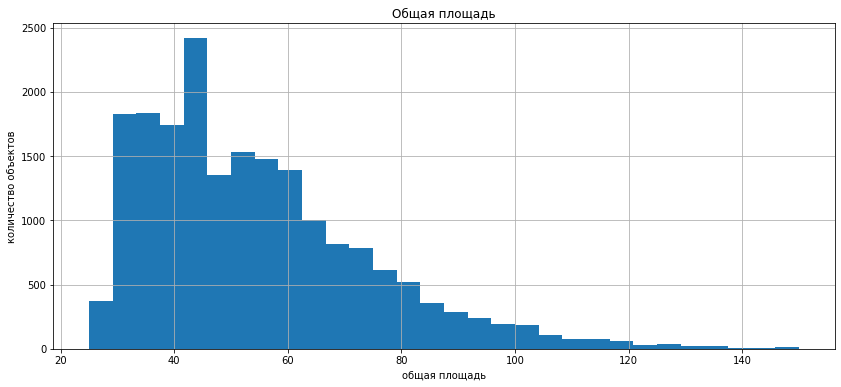

In [85]:
plt.title('Общая площадь')
plt.xlabel('общая площадь')
plt.ylabel('количество объектов')
df['total_area'].hist(bins=30, figsize=(14, 6));
plt.show()

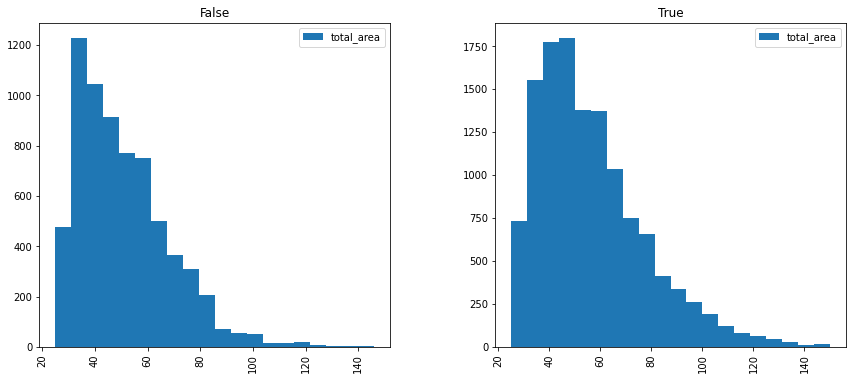

In [86]:
df.hist(column='total_area', by='is_spb', figsize=(14, 6), legend=True, bins=20);

In [87]:
def all_describe(col):
    a = pd.DataFrame(df[col].describe())
    b = df.loc[df['is_spb']==True, col].describe()
    b.name = col + '_cpb'
    b = pd.DataFrame(b)
    c = df.loc[df['is_spb']==False, col].describe()
    c.name = col + '_cpb_obl'
    c = pd.DataFrame(c)
    return a.join([b, c])

all_describe('total_area')


,total_area,total_area_cpb,total_area_cpb_obl
count,19406.000000,12595.000000,6811.000000
mean,54.430336,56.299200,50.974406
std,19.908314,20.980018,17.232410
min,25.000000,25.000000,25.000000
25%,39.500000,40.700000,37.000000
50%,50.000000,51.700000,47.000000
75%,65.000000,67.400000,60.500000
max,150.000000,150.000000,146.000000


**Среди объектов недвижимости, выставленных на продажу В Санкт-Петербурге и области, преобладают объекты общей площадью от 47 до 52 м2.**, гистаграмма показывает асимметричное правостороннее распределение, где средняя больше медианы.
С Санкт-Петербурге медианное значение выше, чем в области, примерно на 10%. Думаю, это связано с тем, что в Санкт-Петербурге большие площади в квартирах эконом класса.

##### Жилая площадь

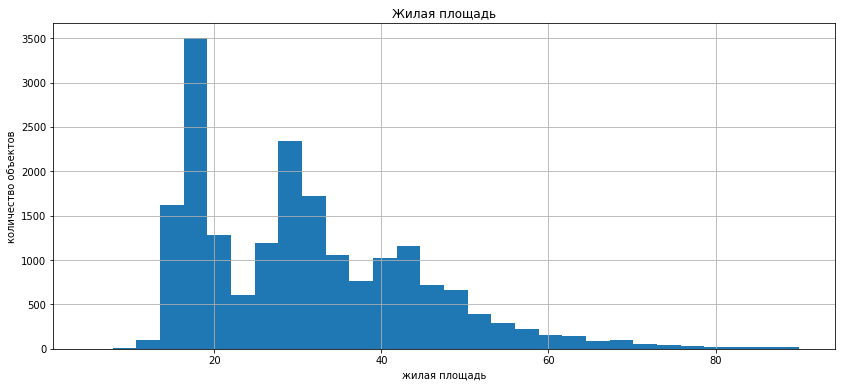

In [88]:
plt.title('Жилая площадь')
plt.xlabel('жилая площадь')
plt.ylabel('количество объектов')
df['living_area'].hist(bins=30, range=(5, 90), figsize=(14, 6));
plt.show()

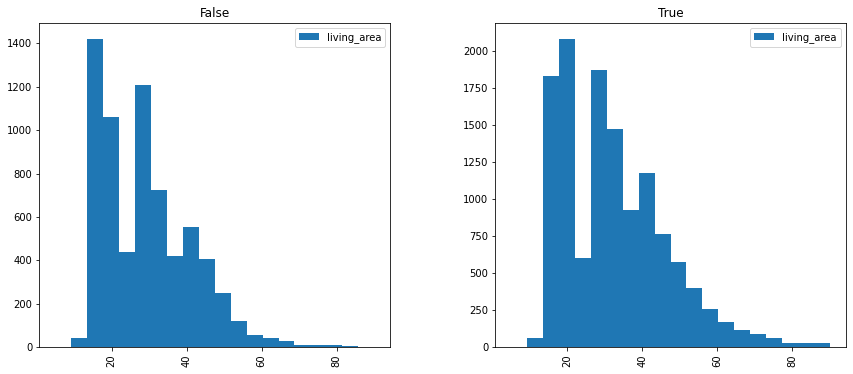

In [89]:
df.hist(column='living_area', by='is_spb', range=(5, 90), figsize=(14, 6), legend=True, bins=20);

In [90]:
all_describe('living_area')

,living_area,living_area_cpb,living_area_cpb_obl
count,19406.000000,12595.000000,6811.000000
mean,31.224802,32.376613,29.094855
std,13.729308,14.423804,12.057025
min,9.000000,9.000000,11.300000
25%,18.800000,19.500000,18.000000
50%,29.600000,30.000000,28.000000
75%,39.900000,41.000000,36.500000
max,128.000000,128.000000,100.000000


Гистограмма жилой площади имеете два пика (если число корзин уменьшить до стандартных 10, пик будет один), 16-18 м2 и 28-32 м3 - это жилая площадь стандартных однушек и двушек.
Жилая плащадь в области меньше, чем в Санкт-Петербурге примерно на 8-9%.
Наиболее часто предлагаемые на рынке недвижимости объекты имеют жилую площадь 16-18 м2.

##### Площадь кухни

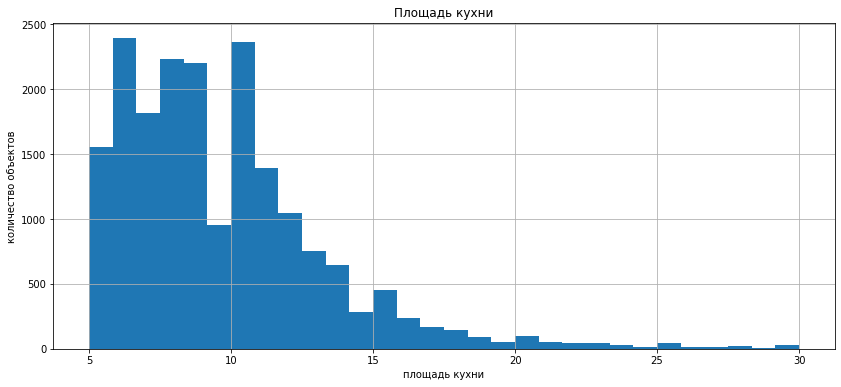

In [91]:
plt.title('Площадь кухни')
plt.xlabel('площадь кухни')
plt.ylabel('количество объектов')
df['kitchen_area'].hist(bins=30, range=(5, 30), figsize=(14, 6));
plt.show()

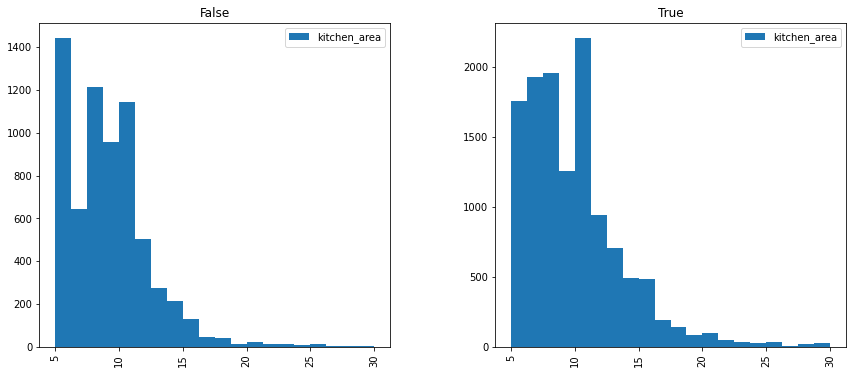

In [92]:
df.hist(column='kitchen_area', by='is_spb', range=(5, 30), figsize=(14, 6), legend=True, bins=20);

In [93]:
all_describe('kitchen_area')

,kitchen_area,kitchen_area_cpb,kitchen_area_cpb_obl
count,19406.000000,12595.000000,6811.000000
mean,9.689092,9.959572,9.188917
std,3.848598,4.054856,3.378410
min,1.300000,1.300000,2.300000
25%,7.000000,7.000000,6.600000
50%,9.000000,9.000000,8.800000
75%,11.167343,11.700000,10.867549
max,50.200000,50.200000,40.000000


Наиболее часто встречаемая площадь кухни - стандартные в РФ 9 м2. 
В Санкт-Петербурге больше объектов с индивидуальной планировкой кухни, чем в области.

##### Цена объекта

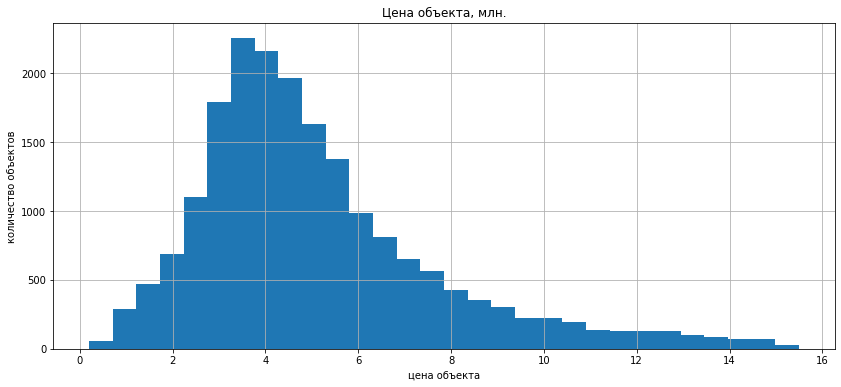

In [94]:
df['last_price'] = df['last_price']/1000000
plt.title('Цена объекта, млн.')
plt.xlabel('цена объекта')
plt.ylabel('количество объектов')
df['last_price'].hist(bins=30, range=(0.2, 15.5), figsize=(14, 6));
plt.show()

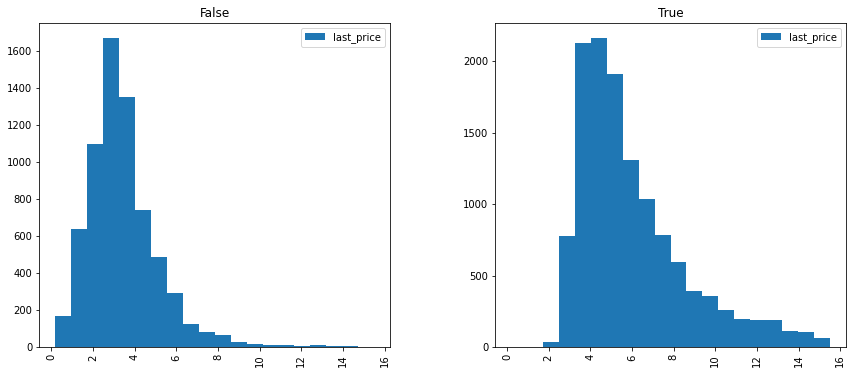

In [95]:
df.hist(column='last_price', by='is_spb', range=(0.2, 15.5), figsize=(14, 6), legend=True, bins=20);

In [96]:
all_describe('last_price')

,last_price,last_price_cpb,last_price_cpb_obl
count,19406.000000,12595.000000,6811.000000
mean,5.102991,6.000505,3.443297
std,2.620765,2.598235,1.685841
min,0.500000,1.200000,0.500000
25%,3.395114,4.100000,2.360000
50%,4.500000,5.220000,3.200000
75%,6.200000,7.200000,4.200000
max,15.000000,15.000000,15.000000


Размах цен большой. В базе находятся объекты из разных рыночных сегментов. Анализировать их вместе, наверное, не правильно.
Можно говорить только о средних и медианных значениях. Они довольно близки, если бы не выбросы с дорогими объектами, можно было бы сказать, что имеет место нормальное распределение, особенно по области.
В Санкт-Петербурге квартиры дороже, чем в области более,чем на 50%.
Учитывая, что площади в области ниже только на 10%, прирост в стоимости приемущественно происходит за счет роста стоимости 1 м2.

In [97]:
all_describe('square_meter_price')

,square_meter_price,square_meter_price_cpb,square_meter_price_cpb_obl
count,19406.000000,12595.000000,6811.000000
mean,93643.211953,107290.586431,68406.289099
std,30887.553191,24879.011710,24338.972614
min,9615.384615,15345.268542,9615.384615
25%,75555.555556,90458.891389,51666.666667
50%,93670.795829,103000.000000,68518.518519
75%,111105.967078,119980.815508,84615.384615
max,387096.774194,387096.774194,225971.731449


В Санкт-Петербурге средняя цена за 1м2 107 т., в области - 68 т. Интересно, 
что средняя почти совпадает медианой. Ниже проведем более детальный анализ этого показателя.

##### Количество комнат

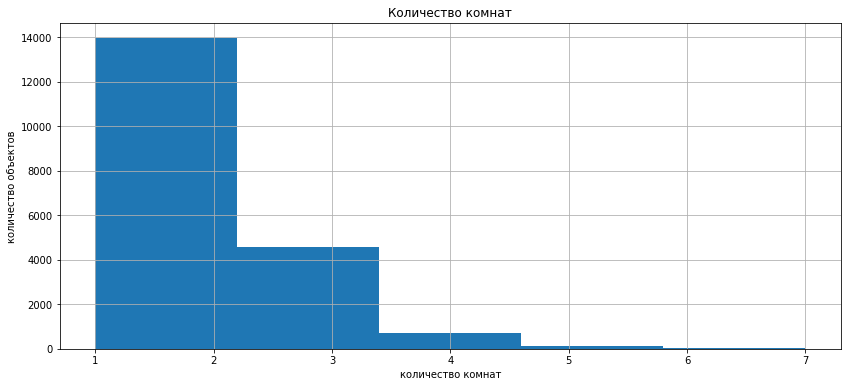

In [98]:
plt.title('Количество комнат')
plt.xlabel('количество комнат')
plt.ylabel('количество объектов')
df['rooms'].hist(bins=5, range=(1, 7), figsize=(14, 6));
plt.show()

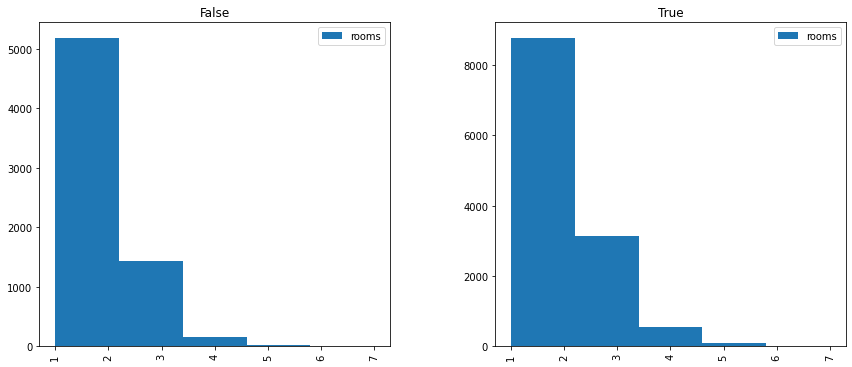

In [99]:
df.hist(column='rooms', by='is_spb', range=(1, 7), figsize=(14, 6), legend=True, bins=5);

In [100]:
all_describe('rooms')

,rooms,rooms_cpb,rooms_cpb_obl
count,19406.000000,12595.000000,6811.000000
mean,1.967124,2.019135,1.870944
std,0.909426,0.934677,0.852530
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,3.000000,3.000000,2.000000
max,7.000000,7.000000,6.000000


Самые продаваемые квартиры - двухкомнатные, на втором месте - однокомнатные. Здесь и Санкт-Петербург и область солидарны, в сегменте 3-х комнатных квартир в Санкт-Петербурге предложение выше.

##### Высота потолков

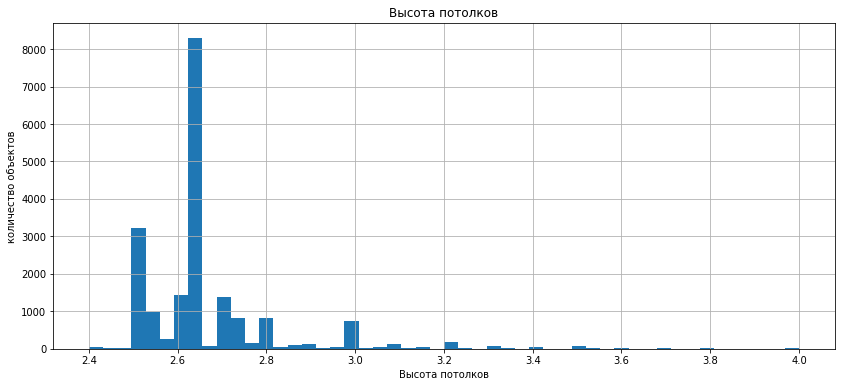

In [101]:
plt.title('Высота потолков')
plt.xlabel('Высота потолков')
plt.ylabel('количество объектов')
df['ceiling_height'].hist(bins=50, range=(2.4, 4), figsize=(14, 6));
plt.show()

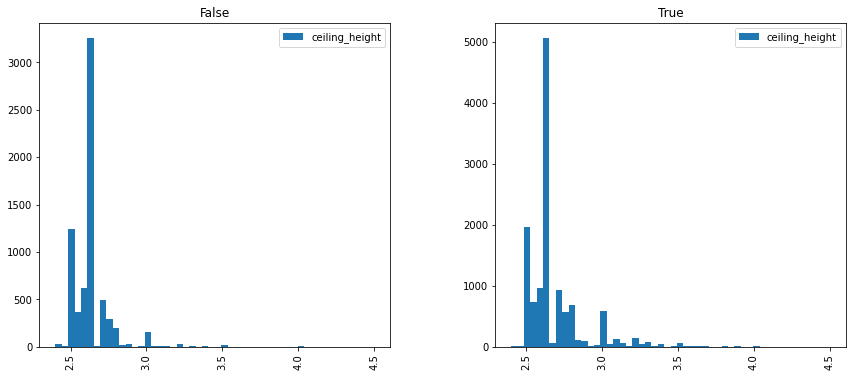

In [102]:
df.hist(column='ceiling_height', by='is_spb', range=(2.4, 4.5), figsize=(14, 6), legend=True, bins=50);

In [103]:
all_describe('ceiling_height')

,ceiling_height,ceiling_height_cpb,ceiling_height_cpb_obl
count,19406.000000,12595.000000,6811.000000
mean,2.675812,2.693762,2.642618
std,0.184619,0.205150,0.132634
min,2.400000,2.400000,2.400000
25%,2.600000,2.600000,2.585000
50%,2.650000,2.650000,2.650000
75%,2.700000,2.700000,2.650000
max,4.800000,4.800000,4.500000


С потолками все понятно, в стране существуют определенные стандарты 2.5 - 2.7, средняя 2.65 м. В Санкт-Петербурге и в области есть дома старой постройки, с высотой потолков более 4 м.

##### Этаж квартиры

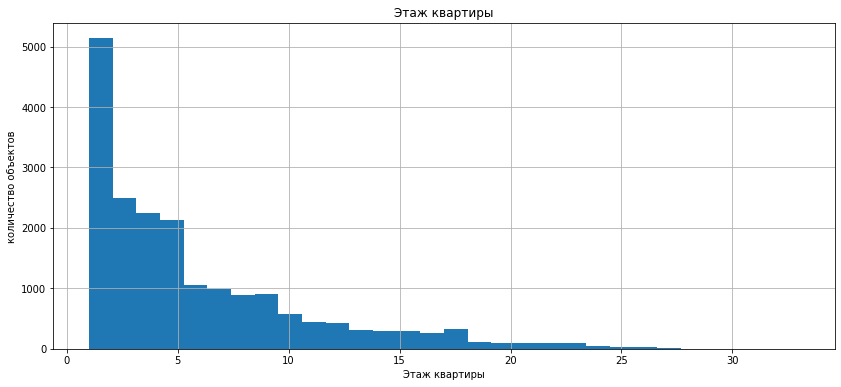

In [104]:
plt.title('Этаж квартиры')
plt.xlabel('Этаж квартиры')
plt.ylabel('количество объектов')
df['floor'].hist(bins=30, range=(1, 33), figsize=(14, 6));
plt.show()

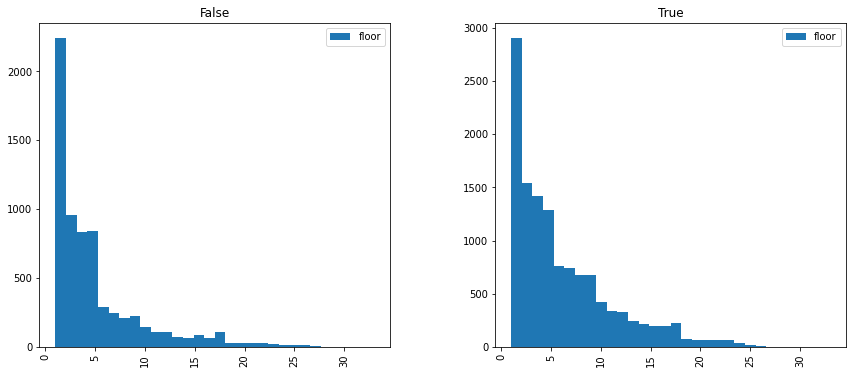

In [105]:
df.hist(column='floor', by='is_spb', range=(1, 33), figsize=(14, 6), legend=True, bins=30);

In [106]:
all_describe('floor')

,floor,floor_cpb,floor_cpb_obl
count,19406.000000,12595.000000,6811.000000
mean,5.932856,6.322668,5.212010
std,4.904444,4.939242,4.756352
min,1.000000,1.000000,1.000000
25%,2.000000,3.000000,2.000000
50%,4.000000,5.000000,4.000000
75%,8.000000,9.000000,6.000000
max,33.000000,33.000000,27.000000


Основной объем предложения приходится на объекты 1-5 этажей. Второе место - 5-10 этажей, третие - 10-20.
В Санкт-Петербурге предложение на объектов на высоких этажах выше, чем в области, что вполне закономерно.

##### Тип этажа квартиры («первый», «последний», «другой»)

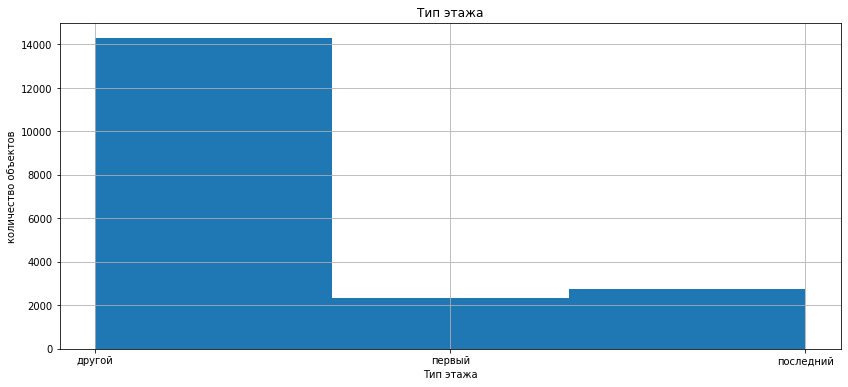

In [107]:
plt.title('Тип этажа')
plt.xlabel('Тип этажа')
plt.ylabel('количество объектов')
df['type_floor'].hist(bins=3, figsize=(14, 6));
plt.show()

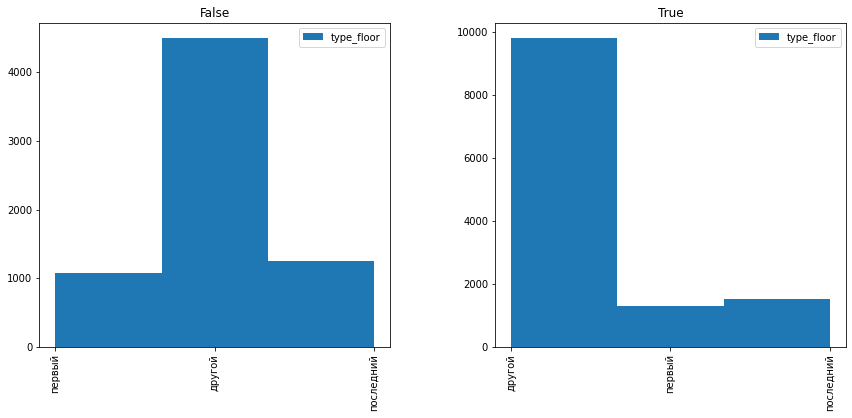

In [108]:
df.hist(column='type_floor', by='is_spb', figsize=(14, 6), legend=True, bins=3);

In [109]:
all_describe('type_floor')

,type_floor,type_floor_cpb,type_floor_cpb_obl
count,19406,12595,6811
unique,3,3,3
top,другой,другой,другой
freq,14290,9799,4491


Вроде бы лидирует тип "другие", но если учесть, что под другими понимаются со 2 по 32 этаж, то понятно, что квартиры на первых и последних этажах чаще меняют владельцев.

##### Общее количество этажей в доме

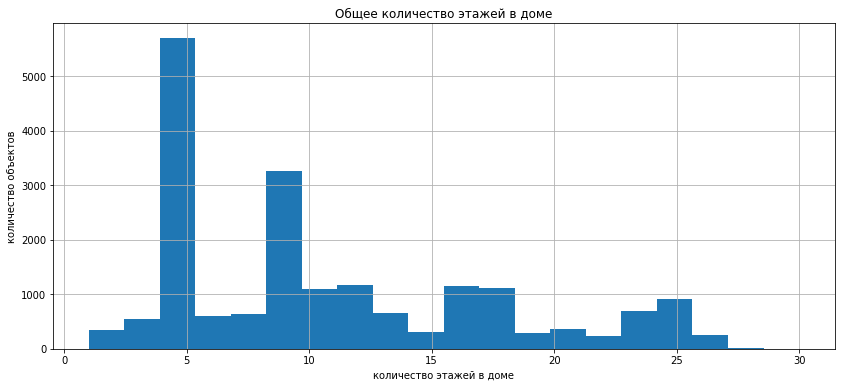

In [110]:
plt.title('Общее количество этажей в доме')
plt.xlabel('количество этажей в доме')
plt.ylabel('количество объектов')
df['floors_total'].hist(bins=20, range=(1, 30), figsize=(14, 6));
plt.show()

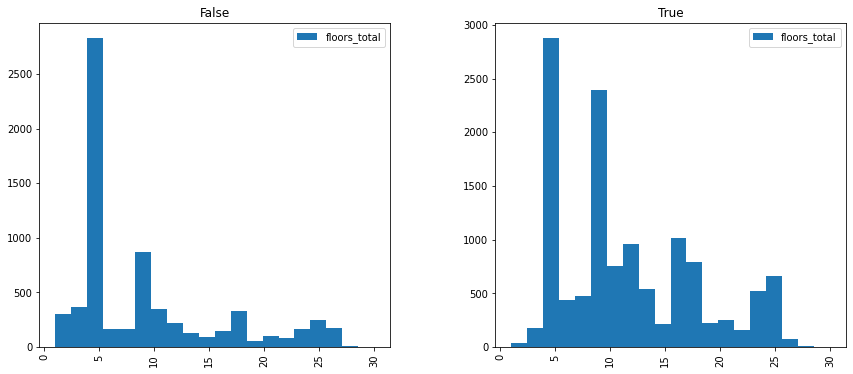

In [111]:
df.hist(column='floors_total', by='is_spb', range=(1, 30), figsize=(14, 6), legend=True, bins=20);

In [112]:
all_describe('floors_total')

,floors_total,floors_total_cpb,floors_total_cpb_obl
count,19406.000000,12595.000000,6811.000000
mean,10.812068,11.653513,9.256056
std,6.620573,6.397181,6.744285
min,1.000000,1.000000,1.000000
25%,5.000000,6.000000,5.000000
50%,9.000000,9.000000,5.000000
75%,16.000000,16.000000,12.000000
max,37.000000,37.000000,29.000000


Санкт-Петербург - быстро растущий старый город с традициями, поэтому график очень ярко показывает наличие старого (малоэтажного) и нового (высокоэтажного) жилого фонда, в области все проще, пока приобладает старое жилье с высотой 1-5 этажей.

##### Расстояние до центра города в метрах

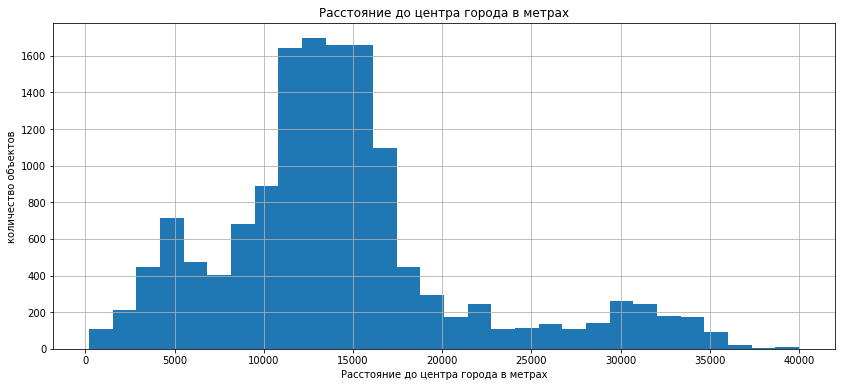

In [113]:
plt.title('Расстояние до центра города в метрах')
plt.xlabel('Расстояние до центра города в метрах')
plt.ylabel('количество объектов')
df['cityCenters_nearest'].hist(bins=30, range=(200, 40000), figsize=(14, 6));
plt.show()

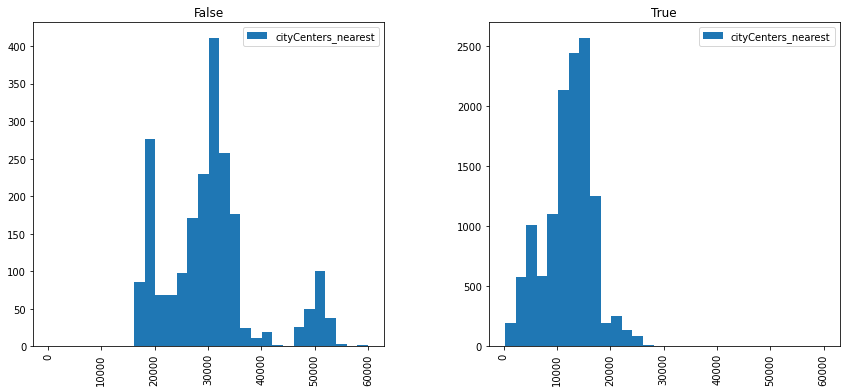

In [114]:
df.hist(column='cityCenters_nearest', by='is_spb', range=(200, 60000), figsize=(14, 6), legend=True, bins=30);

In [115]:
all_describe('cityCenters_nearest')

,cityCenters_nearest,cityCenters_nearest_cpb,cityCenters_nearest_cpb_obl
count,14678.000000,12552.000000,2126.000000
mean,14820.465731,12171.319232,30461.146284
std,8434.831449,4583.007111,9007.706389
min,208.000000,208.000000,17012.000000
25%,10477.250000,9628.000000,24456.000000
50%,13512.500000,12665.000000,30363.000000
75%,16558.750000,15134.000000,33517.000000
max,65952.000000,29493.000000,65952.000000


Очень интересное распределение, город разрастается, пригород приближается к городу.

##### Расстояние до ближайшего аэропорта

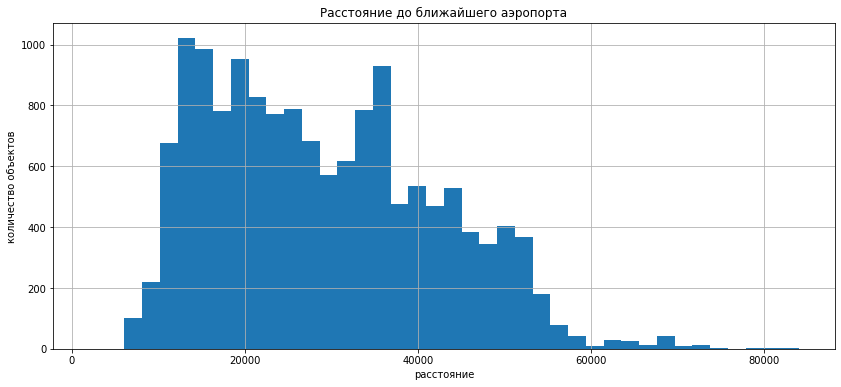

In [116]:
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('расстояние')
plt.ylabel('количество объектов')
df['airports_nearest'].hist(bins=40, range=(2000, 84000), figsize=(14, 6));
plt.show()

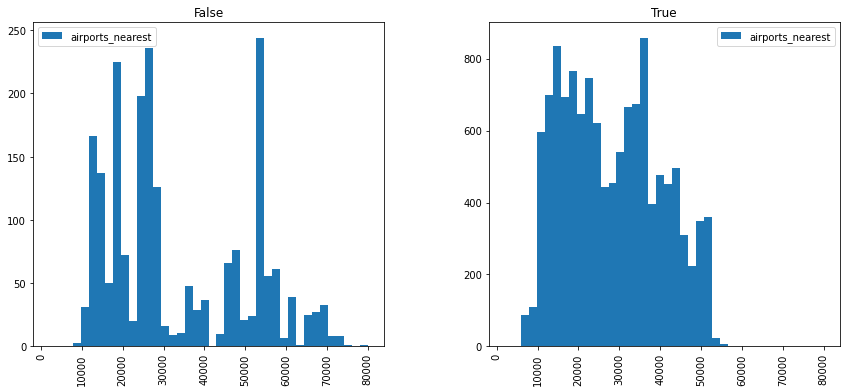

In [117]:
df.hist(column='airports_nearest', by='is_spb', range=(2000, 80000), figsize=(14, 6), legend=True, bins=40);

In [118]:
all_describe('airports_nearest')

,airports_nearest,airports_nearest_cpb,airports_nearest_cpb_obl
count,14663.000000,12536.000000,2127.000000
mean,28968.157335,28225.513561,33345.111895
std,12954.892952,11924.243254,17224.226222
min,0.000000,0.000000,9294.000000
25%,18081.000000,17827.000000,18539.000000
50%,27199.000000,27395.000000,26599.000000
75%,37717.000000,36913.500000,52480.000000
max,84853.000000,54784.000000,84853.000000


Санкт-Петербургу нужно несколько аэропортов, это позволило бы сократить расстояние. А пока... кому-то 30 мин. до аропорта, кому-то 2 часа...если пробок нет.

##### Расстояние до ближайшего парка

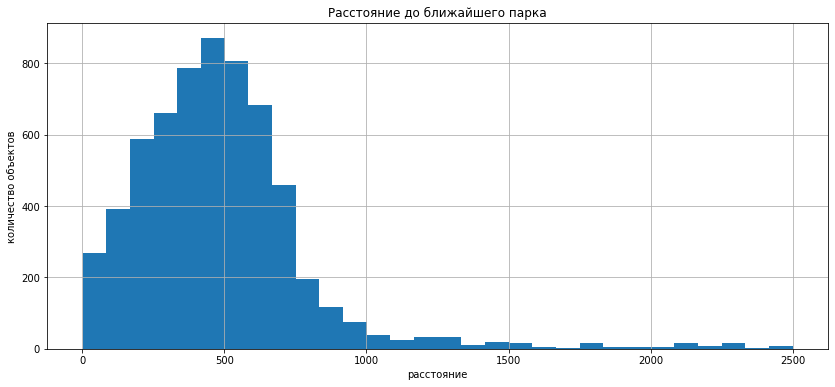

In [119]:
plt.title('Расстояние до ближайшего парка')
plt.xlabel('расстояние')
plt.ylabel('количество объектов')
df['parks_nearest'].hist(bins=30, range=(1, 2500), figsize=(14, 6));
plt.show()

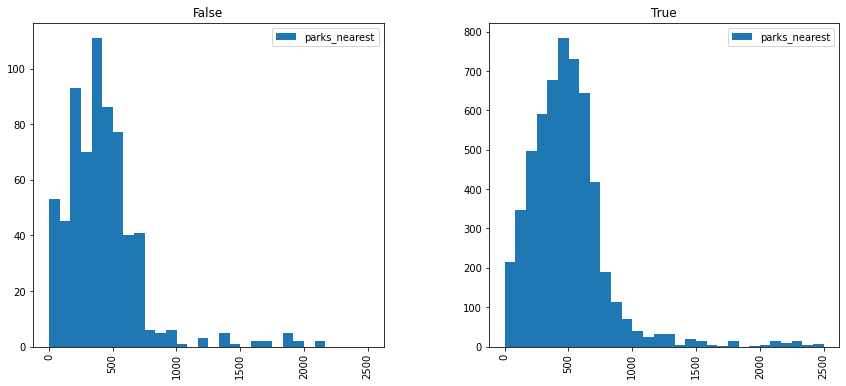

In [120]:
df.hist(column='parks_nearest', by='is_spb', range=(1, 2500), figsize=(14, 6), legend=True, bins=30);

In [121]:
all_describe('parks_nearest')

,parks_nearest,parks_nearest_cpb,parks_nearest_cpb_obl
count,6181.000000,5525.000000,656.000000
mean,489.163242,497.305158,420.589939
std,329.478948,330.957467,308.574691
min,1.000000,1.000000,4.000000
25%,291.000000,302.000000,230.750000
50%,456.000000,463.000000,379.000000
75%,612.000000,620.000000,531.000000
max,3190.000000,3190.000000,2131.000000


Санкт-Петербург и область зеленые города! У большинства объектов парк в пешей доступности. Только картографических данных мало, всего 6185 объектов имеют эту информацию. Поэтому мой прекрасный вывод может быть поспешным.

##### День и месяц публикации объявления

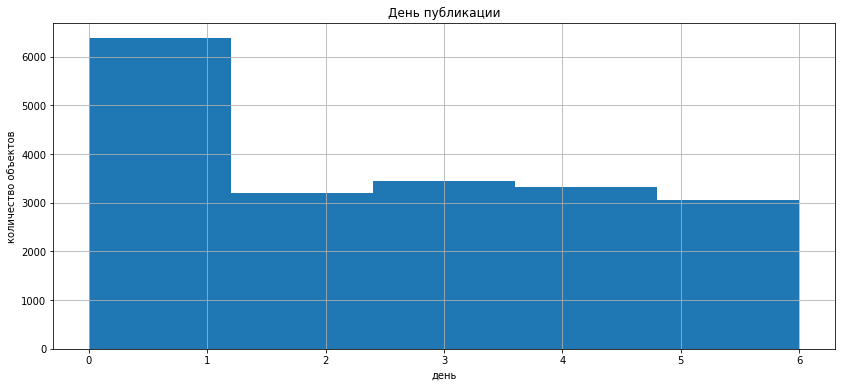

In [122]:
plt.title('День публикации')
plt.xlabel('день')
plt.ylabel('количество объектов')
df['weekday_first_day_exposition'].hist(bins=5, range=(0, 6), figsize=(14, 6));
plt.show()

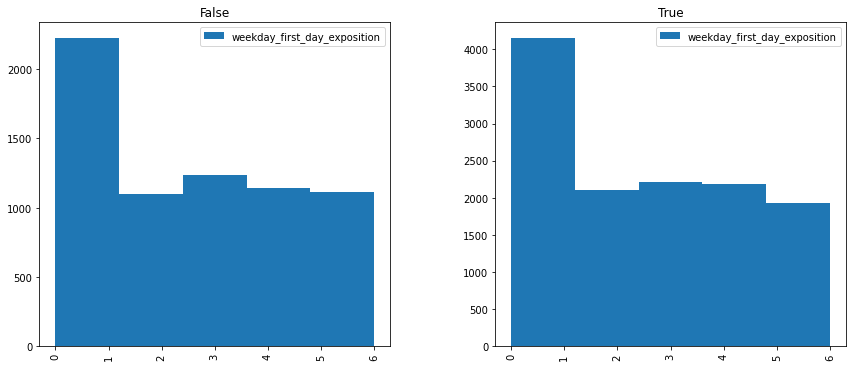

In [123]:
df.hist(column='weekday_first_day_exposition', by='is_spb', range=(0, 6), figsize=(14, 6), legend=True, bins=5);

Все новое обычно начинают в понедельник, скорее всего это связано с режимом работы риэлторов или привычкой начинать новые дела с понедельника.

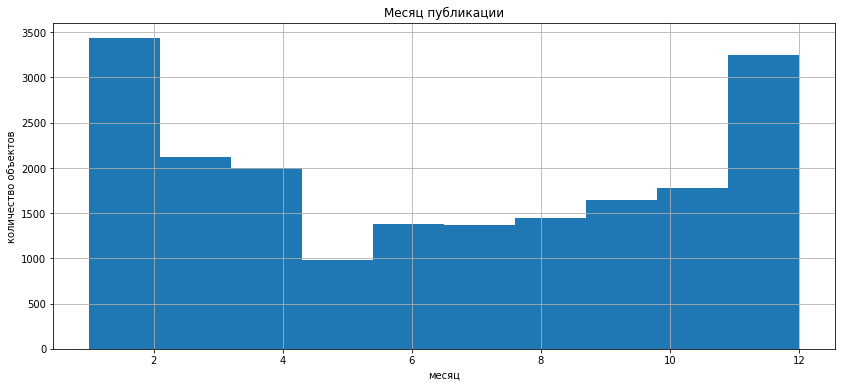

In [124]:
plt.title('Месяц публикации')
plt.xlabel('месяц')
plt.ylabel('количество объектов')
df['month_first_day_exposition'].hist(bins=10, range=(1, 12), figsize=(14, 6));
plt.show()

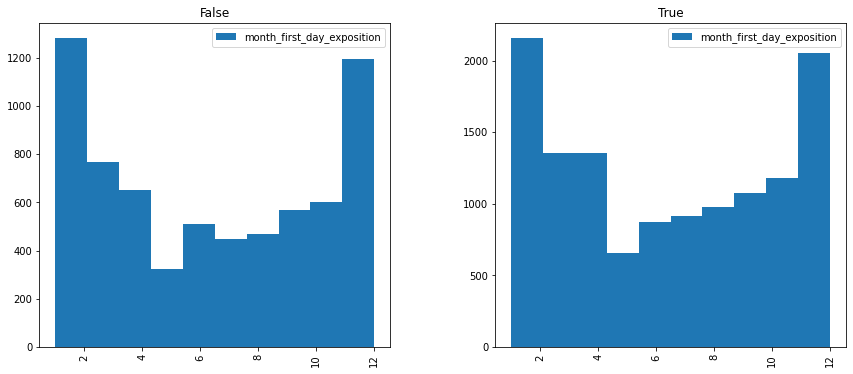

In [125]:
df.hist(column='month_first_day_exposition', by='is_spb', range=(1, 12), figsize=(14, 6), legend=True, bins=10);

Лето - время отпусков, деловая активность падает, снижается количество публикуемых объявлений, в декабре - январе - выплата годовых бонусов, активность на рынке растет.

##### Задание: "Изучите, как быстро продавались квартиры (столбец days_exposition)."

Построю:
- общую гистограмму;
- гистограммы в разрезе территорий (Санкт-Петербург, область);
- гистограммы в разрезе количества комнат;
- запрошу описательную статистику методом describe;
- воспользусь методом value_counts, чтобы уточнить частоту того или иного срока экспозиции.

На самом деле много всего, но я пока точно не знаю, что ищу. Четкой гипотизы нет, может что-то получится найти.

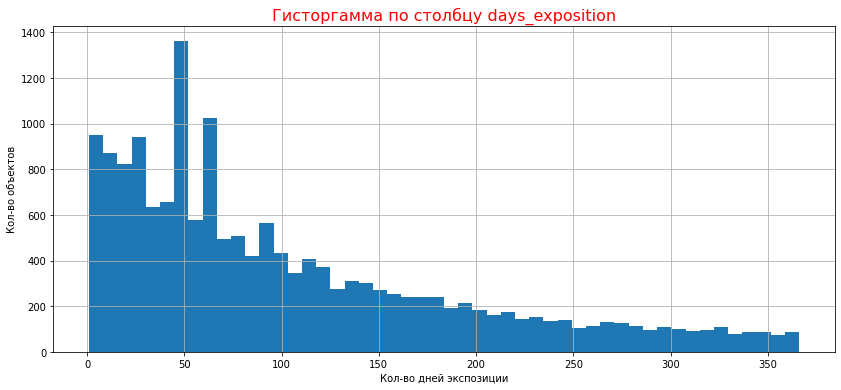

In [126]:
df['days_exposition'].hist(bins=50, range=(1, 366), figsize=(14, 6))
plt.xlabel('Кол-во дней экспозиции')
plt.ylabel('Кол-во объектов')
plt.title('Гисторгамма по столбцу days_exposition', size=16, color='red')
plt.show()

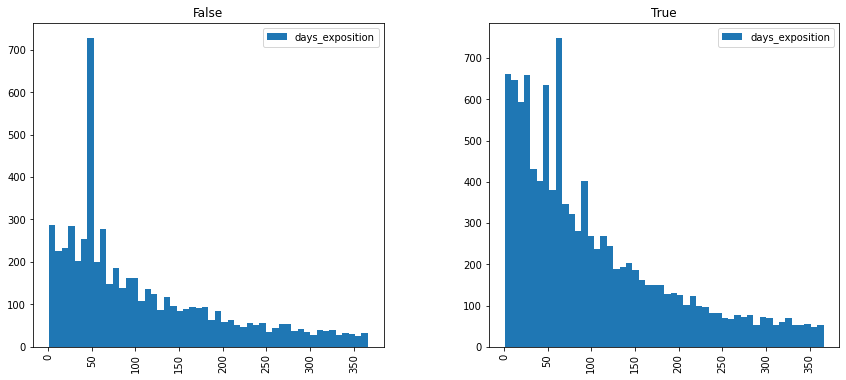

In [127]:
df.hist(column='days_exposition', by='is_spb', range=(1, 366), figsize=(14, 6), legend=True, bins=50);

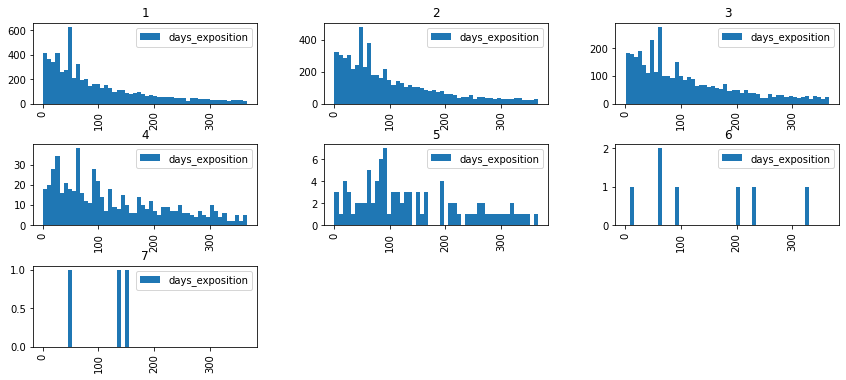

In [128]:
df.hist(column='days_exposition', by='rooms', range=(1, 366), figsize=(14, 6), legend=True, bins=50);

In [129]:
all_describe('days_exposition').round(2)

,days_exposition,days_exposition_cpb,days_exposition_cpb_obl
count,16608.00,10877.00,5731.00
mean,103.96,102.29,107.13
std,89.25,88.71,90.20
min,1.00,1.00,3.00
25%,37.00,33.00,44.00
50%,73.00,72.00,74.00
75%,152.00,149.00,159.00
max,365.00,365.00,365.00


In [130]:
df['days_exposition'].value_counts()

45.0     862
60.0     534
7.0      226
30.0     198
4.0      168
        ... 
362.0      6
341.0      6
351.0      6
2.0        3
1.0        1
Name: days_exposition, Length: 365, dtype: int64

Очень интересный столбец. 

На втором этапе исследования, я удалила показавшиеся мне подозрительными 2740 объектов
со сроком экспозиции более 366 дней. Максимальный срок экспозиции до чистки данных составлял 1580 дней, медиана - 95 дней,
средняя - 166 дней.
Оставив объекты со сроком экспозиции не более 366 дней, я сократила среднюю до 105 дней, а медиана так и осталась - 96 дней.

**Вывод:**
- похоже подтверждаются слухи о том, что в базах много фейковых объявлений, которые размещатся риэлторами исключительно с целью привлечения внимания потенциальных клиентов и реального объекта за этими объявлениями нет.
- наибольшое количество объектов имет срок экспозиции 95, 96, 45 и 60 дней, причем всплеск не зависит ни от трриториальной принадлежности объекта (Санкт-Петербург или область), ни от количества комнат (площади) объекта. Странно видеть такие круглые цифры, это похоже на срок действия договора с риэлтором.

Я далека от этой темы, но наличие большого объема данных помагает искать интересные закономерности и может помочь сайту вычислить недобросовестных клиентов, размещащих фейковые объявления.

Кроме графиков иинтерес могут представлять сводные таблицы

In [131]:
df_table = df.pivot_table(index='locality_name', values='days_exposition', aggfunc=['count', 'mean', 'median']).round(2)
df_table.columns = ['count_object', 'mean_days_exposition', 'median_days_exposition']
df_table.sort_values(by='count_object', ascending=False).head(10)

,count_object,mean_days_exposition,median_days_exposition
locality_name,,,
Санкт-Петербург,10877,102.29,72.0
поселок Мурино,465,94.33,66.0
поселок Шушары,358,104.05,78.0
Всеволожск,281,122.87,91.0
Колпино,273,93.25,60.0
поселок Парголово,261,97.97,64.0
Пушкин,253,127.42,102.0
деревня Кудрово,246,100.91,60.5
Гатчина,221,104.48,75.0


Вывод, конечно, не поменялся: наибольшее число объектов имеют срок экспозиции от 90 до 100 дней. Однако, в отличие от графика, из сводной таблиц можно быстро получить конкретные даныые и ответить на вопросы где, сколько, как быстро. 

Мне еще интересно посмотреть как быстро продаются объекты в зависимости от количества комнат, с помощь сводных таблиц мое любопытство можно быстро удовлетворить:

In [132]:
df.pivot_table(index='rooms', values='days_exposition', aggfunc=['count', 'mean', 'median']).round(2)

,count,mean,median
,days_exposition,days_exposition,days_exposition
rooms,,,
1,6350,97.34,64.0
2,5871,102.75,73.0
3,3714,112.81,86.0
4,570,125.96,99.0
5,93,140.77,112.0
6,7,139.86,90.0
7,3,112.67,138.0


Остался последний вопрос в теме, какие продажи считать быстрыми, какие долгими. Думаю, ответ будет субъективным:
- быстрые продажи от 1 до 44 дней (<25%);
- долгие продажи от 135 дней и более (>75%).

##### Задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта?"

Постройте графики, которые покажут зависимость цены от указанных ниже параметров. 
  - общей площади;
  - жилой площади;
  - площади кухни;
  - количество комнат;
  - типа этажа, на котором расположена квартира (первый, последний, другой);
  - даты размещения (день недели, месяц, год);

Установить зависимость между количественными переменными можно с помощью матрицы диаграмм рассеивания и матрицы корреляции.

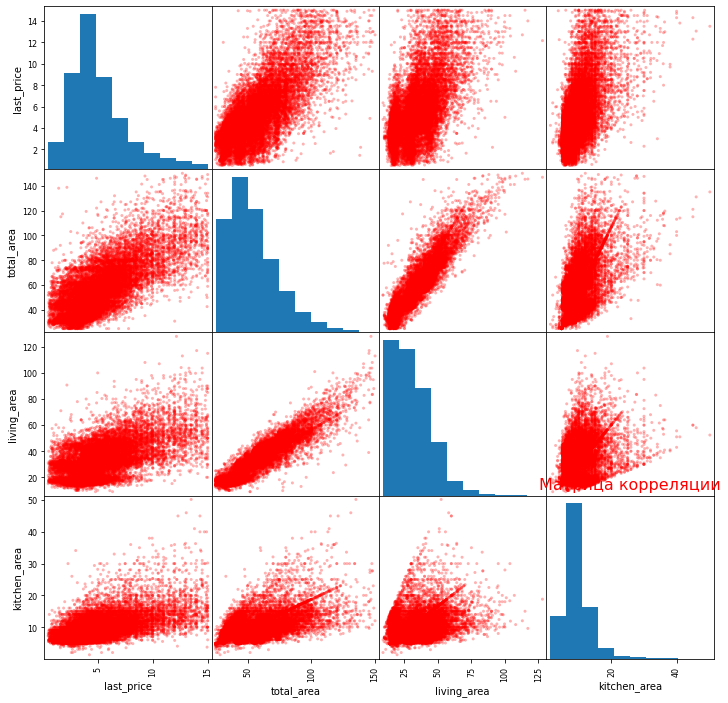

In [133]:
pd.plotting.scatter_matrix(df.loc [:, ['last_price', 'total_area', 'living_area', 'kitchen_area']], color = 'red', alpha=0.3, figsize=(12,12))
plt.title('Матрица корреляции', size=16, color='red')
plt.show()

In [134]:
df.loc [:, ['last_price', 'total_area', 'living_area', 'kitchen_area']].corr().round(2)

,last_price,total_area,living_area,kitchen_area
last_price,1.00,0.74,0.62,0.56
total_area,0.74,1.00,0.92,0.55
living_area,0.62,0.92,1.00,0.31
kitchen_area,0.56,0.55,0.31,1.00


**Вывод:**


между стоимостью объекта и его площадью существует прямая зависимость(положительная корреляция), но сила зависимоти разная:

- стоимость  в большей степени зависит от общей площади квартиры: к-т корреляции Пирсона = 0.74
- в меньшей степени стоимость квартиры зависит от жилой площади: к-т корреляции Пирсона = 0.62
- еще ниже зависимоть стоимости от плащади кухни: к-т корреляции Пирсона = 0.56

Вывод логичный, общую площадь не изменишь, а перепланировка почти всегда возможна. Остается правда сомнение в линейности зависимоти между стоимостью и площадью, возможно коэффициент Пирсона не до конца уловил силу взаимосвязи. 

Искать зависимость между количественной и категориальной переменными сложнее. Мы не проходили в рамках этого курса ни точечно-бисериальный коэффициент корреляции, ни корреляционные отношения. Поэтому использую сводные таблицы, найду влияние фактора на стоимость 1м2 и построю столбчатый график.

In [135]:
df_pivot_table_rooms = df.pivot_table(index='rooms', values=['last_price', 'total_area'])
df_pivot_table_rooms['meter_price'] = df_pivot_table_rooms['last_price']/df_pivot_table_rooms['total_area'].round(2)
df_pivot_table_rooms

,last_price,total_area,meter_price
rooms,,,
1,3.779833,37.512625,0.100769
2,5.181000,54.822289,0.094509
3,6.501903,73.082495,0.088970
4,7.604486,87.187621,0.087217
5,9.475744,113.929600,0.083172
6,10.988125,116.543750,0.094286
7,13.872500,126.200000,0.109925


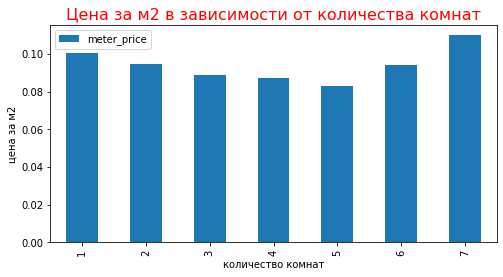

In [136]:
df_pivot_table_rooms.plot(y='meter_price', kind='bar', figsize=(8,4))
plt.xlabel('количество комнат')
plt.ylabel('цена за м2')
plt.title('Цена за м2 в зависимости от количества комнат', size=16, color='red')
plt.show()

Вывод:

Стоимость квартиры вряд ли зависит от количества комнат, так как площади комнат могут быть разными.
А вот на стоимост 1м2 количество комнат оказывает влияние: 
- в квартирах с 1-5 комнатами обратная зависимость между количеством комнат и стоимостью 1м2;
- в квартирах с 6-7 комнатами зависимоть между количеством комнат и стоимостью 1м2 прямая.
Это можно объяснить тем, что 1-5 комнатные квартиры относятся к эконом классу, а 6-7 - к бизнес классу, 
то есть отличаются не только количественными, но и качественными характеристиками.


In [137]:
df_pivot_table_type_floor = df.pivot_table(index='type_floor', values=['last_price', 'total_area'])
df_pivot_table_type_floor['meter_price'] = df_pivot_table_type_floor['last_price']/df_pivot_table_type_floor['total_area'].round(2)
df_pivot_table_type_floor

,last_price,total_area,meter_price
type_floor,,,
другой,5.304369,54.414255,0.097489
первый,4.270308,53.485571,0.079834
последний,4.770967,55.319406,0.086243


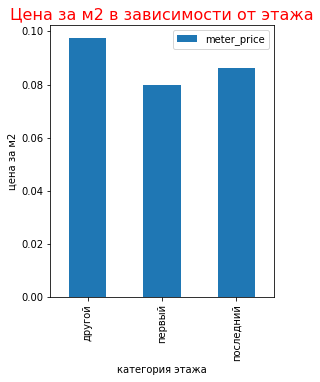

In [138]:
df_pivot_table_type_floor.plot(y='meter_price', kind='bar', figsize=(4,5))
plt.xlabel('категория этажа')
plt.ylabel('цена за м2')
plt.title('Цена за м2 в зависимости от этажа', size=16, color='red')
plt.show()

**Вывод:**

Данные подтверждают давно известный факт, люди предпочитают жить на средних этажах, а первые и последние этажи чаще меняют владельцев, так как рассматриваются в качестве временного места проживания. Это находит отражение и цене за 1м2.

In [139]:
df_pivot_table_weekday = df.pivot_table(index='weekday_first_day_exposition', values=['last_price', 'total_area'])
df_pivot_table_weekday['meter_price'] = df_pivot_table_weekday['last_price']/df_pivot_table_weekday['total_area'].round(2)
df_pivot_table_weekday

,last_price,total_area,meter_price
weekday_first_day_exposition,,,
0,5.103130,54.679319,0.093327
1,5.155225,54.474996,0.094643
2,5.116913,54.256369,0.094304
3,5.078496,54.366191,0.093406
4,5.120051,54.547187,0.093860
5,5.028816,54.376693,0.092475
6,5.049040,54.143272,0.093259


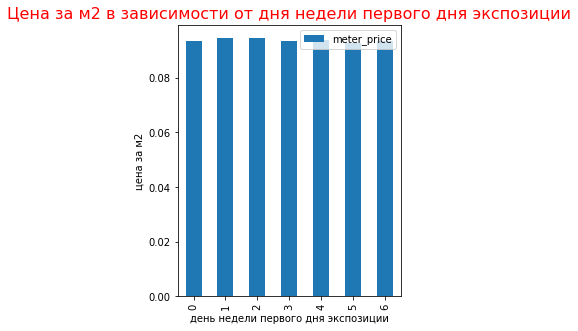

In [140]:
df_pivot_table_weekday.plot(y='meter_price', kind='bar', figsize=(4,5))
plt.xlabel('день недели первого дня экспозиции')
plt.ylabel('цена за м2')
plt.title('Цена за м2 в зависимости от дня недели первого дня экспозиции', size=16, color='red')
plt.show()

**Вывод**

Зависимости между днем подачи объявления о продажи и стоимостью 1м2 нет. 

In [141]:
df_pivot_table_month = df.pivot_table(index='month_first_day_exposition', values=['last_price', 'total_area'])
df_pivot_table_month['meter_price'] = df_pivot_table_month['last_price']/df_pivot_table_month['total_area'].round(2)
df_pivot_table_month

,last_price,total_area,meter_price
month_first_day_exposition,,,
1,5.062142,53.963838,0.093813
2,5.067915,54.559991,0.092887
3,5.131176,54.032462,0.094969
4,5.225097,54.783831,0.095383
5,5.059670,54.194857,0.093369
6,4.869077,53.805611,0.090486
7,5.166986,55.067449,0.093826
8,5.149844,53.957042,0.095438
9,5.196900,55.080774,0.094352


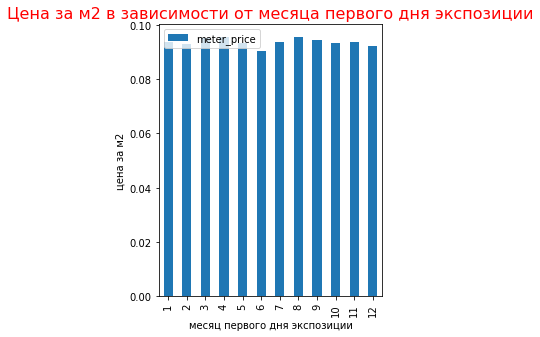

In [142]:
df_pivot_table_month.plot(y='meter_price', kind='bar', figsize=(4,5))
plt.xlabel('месяц первого дня экспозиции')
plt.ylabel('цена за м2')
plt.title('Цена за м2 в зависимости от месяца первого дня экспозиции', size=16, color='red')
plt.show()

**Вывод**

Зависимости между месяцем подачи объявления о продажи и стоимостью 1м2 практически нет. Несущественное снижение стоимости происходит июне и декабре. При желании этому можно найти объяснение. 

In [143]:
df_pivot_table_year = df.pivot_table(index='year_first_day_exposition', values=['last_price', 'total_area'])
df_pivot_table_year['meter_price'] = df_pivot_table_year['last_price']/df_pivot_table_year['total_area'].round(2)
df_pivot_table_year

,last_price,total_area,meter_price
year_first_day_exposition,,,
2014,7.490625,65.746250,0.113926
2015,5.537414,60.378815,0.091709
2016,5.054520,55.630371,0.090860
2017,5.017987,54.639005,0.091837
2018,5.049825,53.874382,0.093741
2019,5.454073,54.170716,0.100684


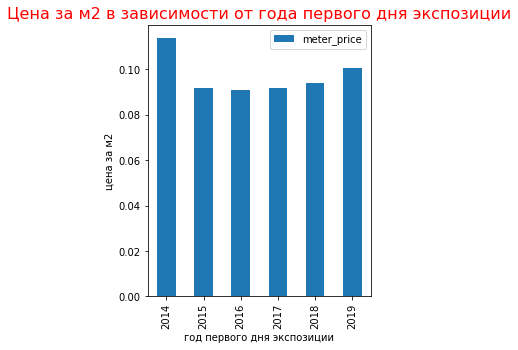

In [144]:
df_pivot_table_year.plot(y='meter_price', kind='bar', figsize=(4,5))
plt.xlabel('год первого дня экспозиции')
plt.ylabel('цена за м2')
plt.title('Цена за м2 в зависимости от года первого дня экспозиции', size=16, color='red')
plt.show()

**Вывод**

Стоимость 1м2 меняется от года к году, это нормально и зависит от многих факторов, например макроэкономического состояния страны, объемов ввода в эксплуатацию нового жилья и т.д.

##### Задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений."

Решим задачу с помощью сводных таблиц

In [145]:
df_table_meter_price = df.pivot_table(index='locality_name', values='square_meter_price', aggfunc=['count', 'mean']).round(2)
df_table_meter_price.columns = ['count_objects', 'mean_meter_price']
df_table_meter_price.sort_values(by='count_objects', ascending=False).head(10).sort_values(by='mean_meter_price', ascending=False)

,count_objects,mean_meter_price
locality_name,,
Санкт-Петербург,12595,107290.59
Пушкин,310,101097.76
деревня Кудрово,246,92278.93
поселок Парголово,286,89992.67
поселок Мурино,470,85324.65
поселок Шушары,390,78606.61
Колпино,303,75057.13
Гатчина,260,69133.25
Всеволожск,339,67532.01


тоже можно сделать с помощью groupby и agg

In [146]:
df_table_meter_price_2 = df.groupby('locality_name').agg({'rooms':'count', 'square_meter_price':'mean'}).sort_values(by=['rooms'], ascending=[False]).head(10).sort_values(by=['square_meter_price'], ascending=[False]).round(2)
df_table_meter_price_2.columns = ['count_objects', 'mean_meter_price']
df_table_meter_price_2

,count_objects,mean_meter_price
locality_name,,
Санкт-Петербург,12595,107290.59
Пушкин,310,101097.76
деревня Кудрово,246,92278.93
поселок Парголово,286,89992.67
поселок Мурино,470,85324.65
поселок Шушары,390,78606.61
Колпино,303,75057.13
Гатчина,260,69133.25
Всеволожск,339,67532.01


##### Задание: "Как стоимость объектов зависит от расстояния до центра города."

In [147]:
df3 = df.copy(deep=True)
df3.dropna(subset=['cityCenters_nearest_km'], inplace=True)
df3['cityCenters_nearest_km'] = df3['cityCenters_nearest_km'].astype(int)
df3 = df3.loc[df3['is_spb']==True]
df_table_km_price = df3.pivot_table(index='cityCenters_nearest_km', values = ['total_area','last_price'])
df_table_km_price['km_price'] = df_table_km_price['last_price']/df_table_km_price['total_area']
df_table_km_price = df_table_km_price.reset_index()
print(df_table_km_price)
df_table_km_price = df_table_km_price[df_table_km_price.km_price<0.15]

    cityCenters_nearest_km  last_price  total_area  km_price
0                        0    9.258000   85.700000  0.108028
1                        1    9.420783   79.473696  0.118540
2                        2    9.014695   76.429885  0.117947
3                        3    8.139514   73.510043  0.110727
4                        4    8.431967   74.762890  0.112783
5                        5    8.412650   71.830299  0.117118
6                        6    7.836402   64.434343  0.121618
7                        7    7.076599   59.987153  0.117969
8                        8    7.134453   61.099261  0.116768
9                        9    6.049074   54.841839  0.110300
10                      10    5.775781   52.745507  0.109503
11                      11    5.567024   52.522767  0.105993
12                      12    5.517129   51.908445  0.106286
13                      13    5.809946   54.013786  0.107564
14                      14    5.443482   52.810108  0.103077
15                      

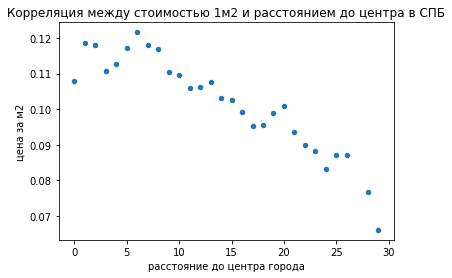

In [148]:
df_table_km_price.plot(x='cityCenters_nearest_km', y='km_price', kind='scatter', title='Корреляция между стоимостью 1м2 и расстоянием до центра в СПБ')
plt.xlabel('расстояние до центра города')
plt.ylabel('цена за м2')
plt.show()

In [149]:
df_table_km_price['cityCenters_nearest_km'].corr(df_table_km_price['km_price'])

-0.9228419501140772

**Вывод:**

Стоимость 1м2 и расстояние до центра города в Санкт-Петербурге имеют сильновыраженную отрицательную корреляцию, коэффициент корреляции Пирсона равен -0.92.


### Общий вывод

**1. На входе был получен csv файл:**
   - 22 столбца и 23699 строк;
   - в 14 из 22 столбцов имелись пропуски;
   - 18 столбцов с типом данных int или float, 3 столбца с типом данных object и 2 столбца с типом bool;
   - практически в каждом столбце с количественными переменными были аномальные значения - выбросы.

  **2. В процессе предобработки данных:**

2.1. заменены пропуски в 7 столбцах:

- is_apartment NaN на False;
- balcony NaN на 0;
- ceiling_height NaN на 2.65 - средняя высота потолков в РФ;
- floors_total NaN на значение столбца floor;
- kitchen_area NaN на расчетную величину;
- living_area NaN на расчетную величину

2.2. удалены пропуски в столбце locality_name - 49 строк;

2.3. изменен тип данных в 5 столбцах:

- в столбце is_apartment с object на bool;
- в столбце first_day_exposition с object на datetime;
- в столбцах floors_total, balcony, days_exposition с float на int;

2.4. удалены неявные дубликаты в столбце locality_name, в результате чего количество уникальных значений столбца уменьшилось с 364 до 318;

2.5. устранены редкие и выбивающиеся значения (аномалии) в 9 столбцах:

- last_price оставила объекты стоимость от 500 000 до 15 000 000, остальные удалила 1214 строк;
- total_area оставила объекты площадью от 25 до 150 м2, удалено - 276 строк;
- rooms - заменила значение 0 на 1, всего 135 замен;
- ceiling_height - значения ниже 2.4 м и выше 5 м. заменены на расчетные значения;
- floors_total - замена в 2 строках;
- living_area и kitchen_area в 305 строках значения поменяла местами, где площадь кухни была больше жилой площади;
- floors_total и floor в 1 строке значения поменяла местами, где этаж объекта, был выше этажа дома;
- days_exposition - оставила объекты со сроком экспозиции до 366 дн и пропуски(объекты в экспозиции), удалено 2754 строк.

2.6. добавлены 7 столбцов:

- is_spb тип bool;
- square_meter_price тип float64;       
- weekday_first_day_exposition тип int64;         
- month_first_day_exposition тип int64;         
- year_first_day_exposition тип int64;       
- type_floor тип object;       
- cityCenters_nearest_km тип float64  

После предобработки датафрейм приобрел следующие характеристики:

- 29 столбцов;
- 19406 строк;
- в 7 столбцах с картографическими данными и в столбце days_exposition сохранились пропуски.


**3. bug report**

1. Столбец locality_name:

В ходе предобработки данных было установлено:
- в 49 объявлениях поле locality_name не было заполнено;
- из 364 уникальных значений поля locality_name 56 значений могут быть скрытыми дублями;
- отсутствие соответствия между названием населенного пункта, указанного в объявлении, и его официальным названиям по многим объектам нет возможности организовать автоматический сбор картографических данных (из 23699 объектов полные картографические данные были предоставлены по 8079 объектам).

Необходимо произвести доработки, в результате которых:
- объявления без указания населенного пункта не будут допускаться к публикации;
- названия населенных пунктов будут соответствовать их официальным названиям и быть уникальными;
- возможность наличия дубликатов из-за букв ё/е, и/й или регистра недопустимы.

2. Необходимо ввести логические проверки на правильность заполнения полей объявления:
- этаж объекта не может быть выше этажности дома;
- высота потолка не может быть ниже установленных стандартов и выше 5 м;
- этажность дома не может превышать высоту самого высокого жилого дома в городе;
- площадь кухни не может быть больше общей площади;
- и т.д. и т.п.

3. Необходимо ограничить срок нахождения объекта в экспозиции.


**3 На основе анализа датафрейма получена следующая информация:**
 -  общая площадь: медиана 47-51.7 м2, в СПБ выше, чем в области;
  - жилая площадь: 2 пика 15-18 м2 и 34-38 м2, что соответствует жилой площади стандартных однушек и двушек;
  - площадь кухни: медиана - стандартные в РФ 9 м2, в СПБ больше объектов с индивидуальной планировкой, чем в области;
  - цена объекта: медиана - 4.5 млн, в СПБ - 5.22 млн., в области - 3.2 млн.;
  - количество комнат: по количеству предложений лидируют 1 и 2 комнатные квартиры;
  - высота потолков: медиана - стандартные в РФ 2.65 м.;
  - этаж квартиры: лидеры предложения - 4-5 этажи;
  - тип этажа квартиры («первый», «последний», «другой»): большой удельный вес 1 и последнего этажа;
  - общее количество этажей в доме: пики гистограммы приходятся на 4-5 и 8-10 этажей, СПБ выше облпсти, высокое предложение многоэтажных новостроек;
  - расстояние до центра города в метрах: город растет, а область приблежается к городу, незаселенной границы между ними нет;
  - расстояние до ближайшего аэропорта: расстояние доходит до 85 км, трудно, когда такой большой город имеет 1 аэропорт;
  - расстояние до ближайшего парка: медиана - 378-463 м., СПБ и область имет хорошее озеленение;
  - день и месяц публикации объявления: чаще всего объявления публикуются в понедельник, пик публикаций - декабрь, январь.

**4. Параметры определения рыночной стоимости объектов недвижимости:**

- высокая корреляция выявлена между стоимость объекта и его общей площадью;
- площадь кухни и жилая площадь имеют средневыраженную корреляцию со стоимостью объекта;
- количество комнат в экономсегменте имеет отрицательную корреляцию со средней стоимостью 1м2;
- средняя стоимость 1м2 на первых и последних этажах ниже, чем на "других" этажах;
- обычно объявления размещаются в понедельник, что связано с режимом работы риэлторов, но это не может быть параметром определения рыночной стоимости объекта;
- рост или снижение платежеспособного спроса в будущем по исследуемой базе данных просчитать невозможно, следовательно месяц и год подачи объявления не будем рассматривать как парамет определения рыночной стоимости объекта;
- расстояние до центра города имеет высокую обратную корреляцию со стоимостью объекта.

В нашей базе не было данных о годе постройки объекта и его качественных характеристик, то есть типа дома: малосемейка, хрущевка, брежневка, сталинка, уп, ип и т.д. Год постройки и тип дома - важные параметры определения рыночной стоимости объекта.

Таким образом, параметры определения рыночной стоимости(по данной базе):
- общая площадь;
- жилая площадь;
- площадь кухни;
- количество комнат;
- тип этажа:
- расстояние до центра города.


**5. Мошенничество и фейковые объявления**

Аномалии в стоимости объектов/стоимости за 1м2 или в продолжительности срока экспозиции могут указывать 
на мошенническую деятельность со стороны лиц, подавших объявления. Самая безобидная цель фейковых объявлений -
привлечь потенциальных покупателей.

Думаю, объявления с аномолиями должны автоматически отслеживаться Яндекс.Недвижимость и блокироваться. 

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод